In [1]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib widget

specind = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED progress/spectral index New 2022_10_18.csv')

Name = specind.Name
z = specind.z
cla = specind.class_name
alpha = specind.alpha
alphaRad = specind.alphaRad
alphaK = specind.alphaK
alphaRadK = specind.alphaRadK

#######################################################################################################
classnameall = []
QSOind = []
BL_Lac_can_ind = []
BL_Lac_galaxy_dom_ind = []
BL_Lac_ind = []
Blazar_ind = []
classclassify = [Blazar_ind, BL_Lac_can_ind, BL_Lac_galaxy_dom_ind, QSOind, BL_Lac_ind]
# there is a blank in "Blazar Uncertain type" 
# NOT REMOVE IT
classnameall  = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac'] 
    
for j in range(0, 5): # 1367
            
    classclassify[j] = np.where( cla == classnameall[j] )[0]
        
#######################################################################################################
z = np.array(z)

z1 = np.where((0 < z) & (z < 1))[0]
z2 = np.where((z >= 1) & (z < 2))[0]
z3 = np.where(z >= 2)[0]
z4 = np.where((0 < z) & (z < 1.5))[0]
z5 = np.where(z >= 1.5)[0]

zsep = [z1, z2, z3, z4, z5]

zsepname = ['0<z<1, N = '+str(len(z1)), '1$\leq$z<2, N = '+str(len(z2)), 'z$\geq$2, N = '+str(len(z3)), '0<z<1.5, N = '+str(len(z4)), 'z$\geq$1.5, N = '+str(len(z5))]

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/73853398.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alpha[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/73853398.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alpha[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/73853398.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alpha[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/73853398.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alpha[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/73853398.py:17: FutureWarning: Passing a set as an indexer is deprecated an

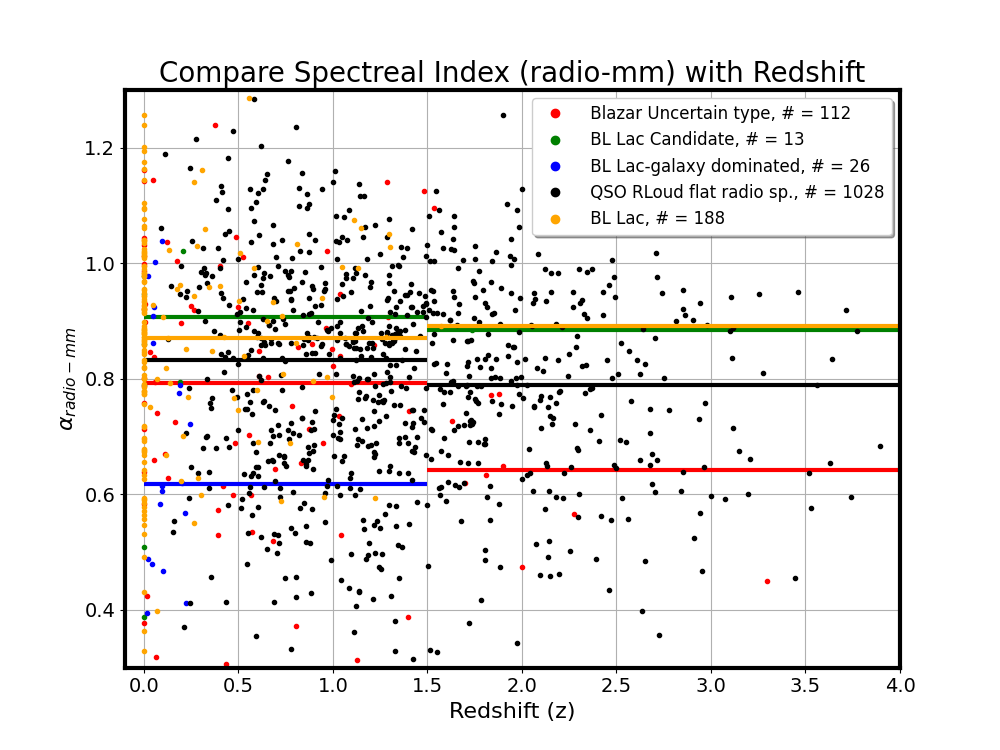

In [2]:
### radio-mm spectral index 
inter = [0 , 1.5 , 4]
color = ['red', 'green', 'blue', 'black', 'orange']

# plot scattering plot
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

for i in range(0, 5):
    labelname = classnameall[i]+', # = '+str(len(classclassify[i]))
    ax.plot(z[classclassify[i]], alpha[classclassify[i]], '.', c = color[i], markersize = 6, label = labelname)
    
    for j in range(0, 2):
        over = set(classclassify[i]) & set(zsep[j+3])
        data = alpha[over]
        data = data[~np.isnan(data)]
        ax.hlines(y = np.median(data), xmin = inter[j], xmax = inter[j+1], linewidth = 3, color = color[i])

ax.set_xlim (-0.1, 4)
ax.set_ylim (0.3, 1.3)
    
plt.xlabel( "Redshift (z)",  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.yticks(fontsize = 14)
figurename = 'Compare Spectreal Index (radio-mm) with Redshift'
plt.title(figurename, fontsize = 20)
plt.grid(True)
plt.legend(loc='upper right', shadow=True, bbox_to_anchor = (1., 1), fontsize = 12, markerscale = 2) 

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300, bbox_inches='tight')

K-S test result: statistic =  0.10773667700851917 P-value = 0.024452992355236812


Text(0.5, 1.0, 'BL Lac and QSO Spectral Index (radio-mm) Comparasion')

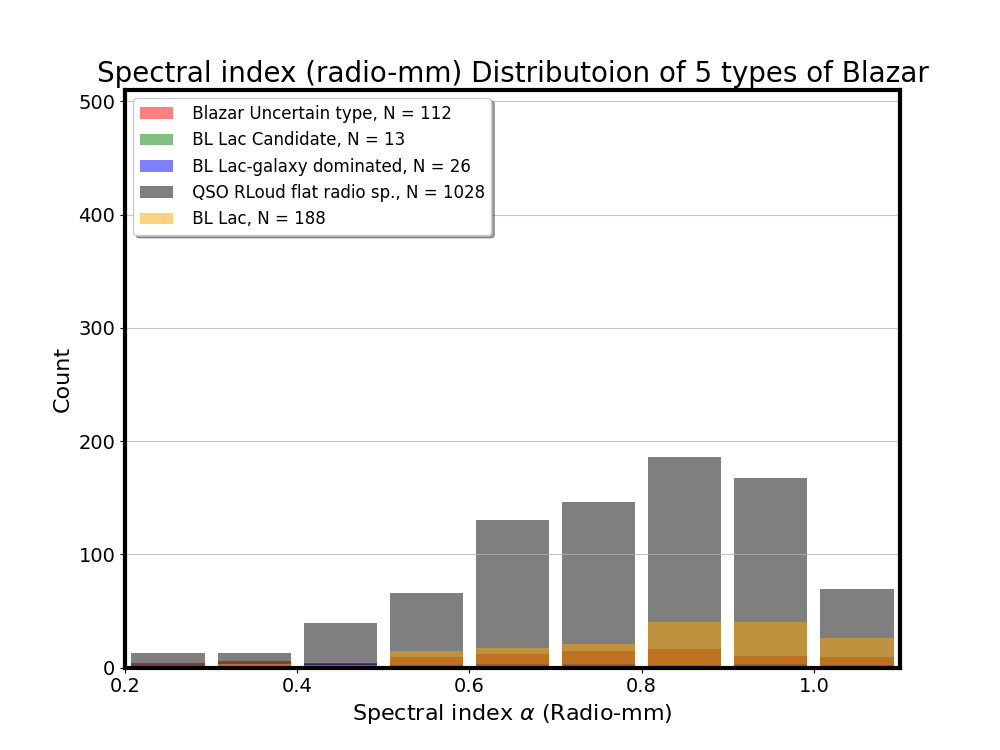

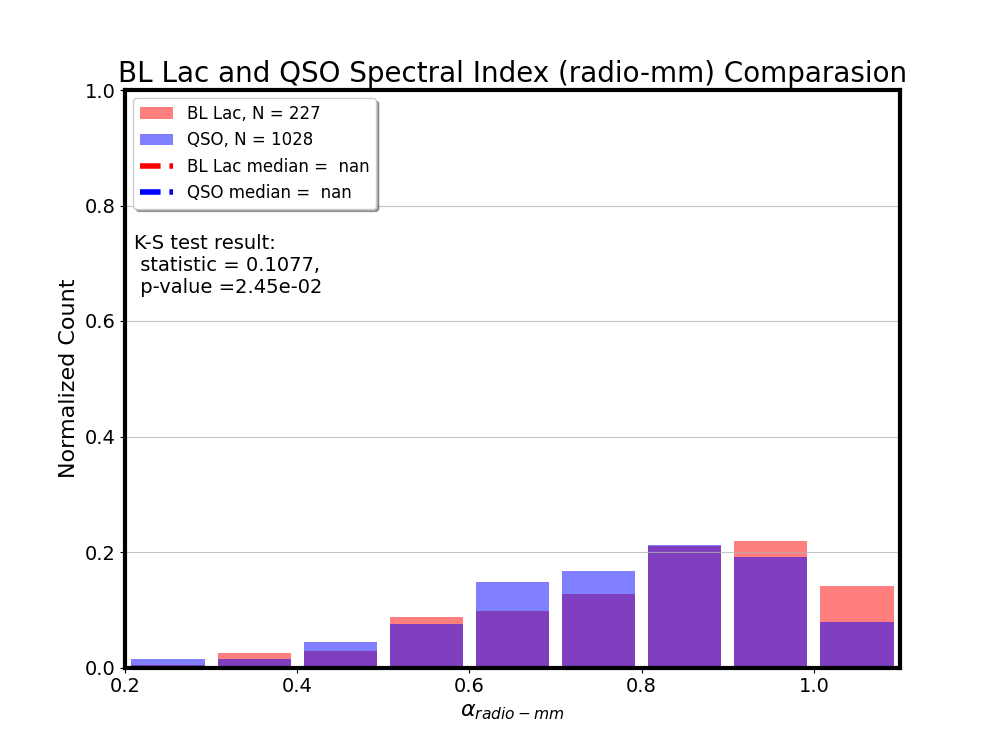

In [3]:
# plot Radio Spectral index Distribute by 5 types of Blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
for i in range(0, 5):
    n, bins, patches = plt.hist(alpha[classclassify[i]], bins = np.arange(0.1, max(alpha[classclassify[i]]) +0.1, 0.1),
                                color = color[i], alpha = 0.5, rwidth=0.85, label = classnameall[i]+', N = '+str(len(alpha[classclassify[i]])))

ax.set_xlim (0.2, 1.1)
ax.set_ylim (0, 510)   
    
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Spectral index $\\alpha$ (Radio-mm)',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Spectral index (radio-mm) Distributoion of 5 types of Blazar'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
BL_Lac = np.hstack([np.array(alpha[classclassify[1]]), np.array(alpha[classclassify[2]]), np.array(alpha[classclassify[4]])])
QSO = np.array(alpha[classclassify[3]])

sta, pvalue = stats.ks_2samp(BL_Lac, QSO)
print('K-S test result: statistic = ', sta, 'P-value =', pvalue)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0.1, max(BL_Lac) +0.1, 0.1), density=True,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
# set maxximum value of y-axis = 1
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(0.1, max(QSO) +0.1, 0.1), density=True,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n))

plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(QSO_med))
    
ax.set_xlim(0.2, 1.1)
ax.set_ylim(0, 1)   

text = 'K-S test result: \n statistic = %6.4f,\n p-value =%.2e' %(sta, pvalue)
plt.text(0.21, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'BL Lac and QSO Spectral Index (radio-mm) Comparasion'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

K-S test result: statistic =  0.5903083700440529 P-value = 2.7092347919807045e-61


Text(0.5, 1.0, 'Redshift Distribution of BL Lac and QSO')

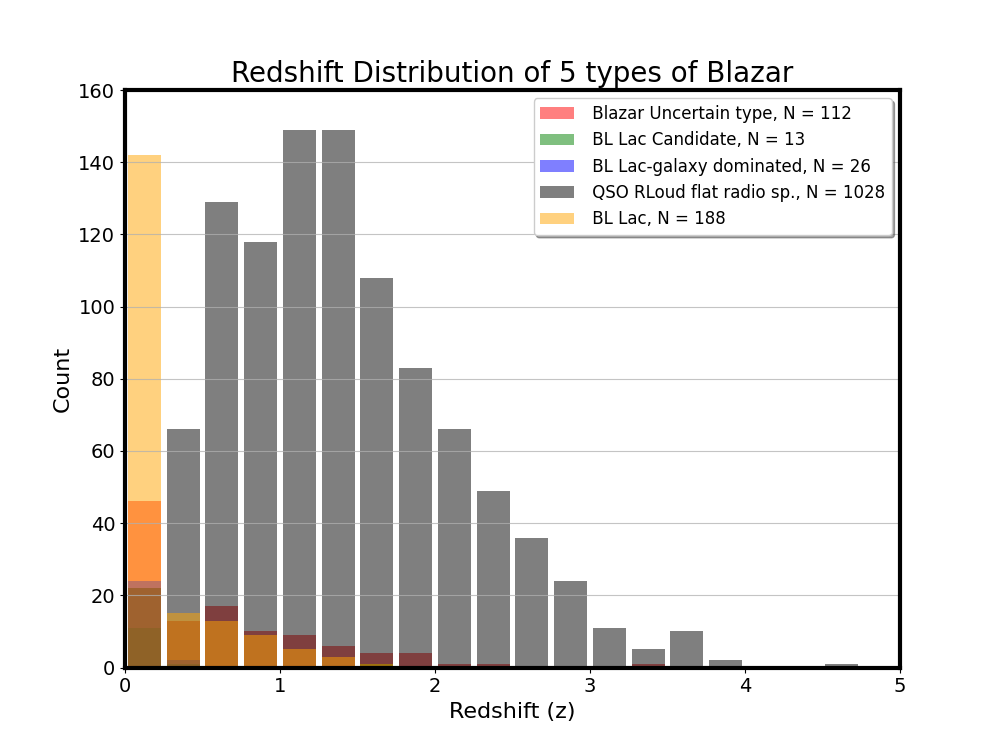

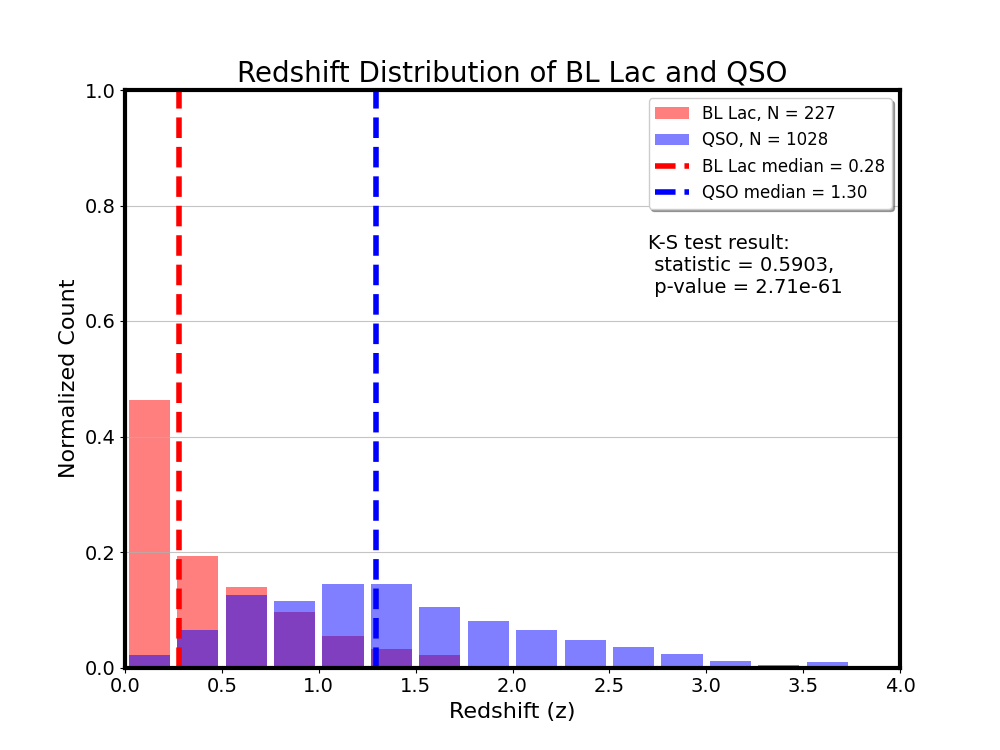

In [4]:
# plot Redshift Distribute by 5 types of Blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
for i in range(0, 5):
    n, bins, patches = plt.hist(z[classclassify[i]], bins = np.arange(0, max(z[classclassify[i]]) +0.25, 0.25),
                                color = color[i], alpha = 0.5, rwidth = 0.85, label = classnameall[i]+', N = '+str(len(z[classclassify[i]])))

ax.set_xlim (0, 5)
ax.set_ylim (0, 160)    
    
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Redshift (z)',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper right', shadow = True,  fontsize = 12, markerscale = 2) 
figurename = 'Redshift Distribution of 5 types of Blazar'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
z_BL_Lac = np.hstack([np.array(z[classclassify[1]]), np.array(z[classclassify[2]]), np.array(z[classclassify[4]])])
z_BL_Lac[z_BL_Lac == 0] = np.nan
z_QSO = np.array(z[classclassify[3]])
z_QSO[z_QSO == 0] = np.nan

sta, pvalue = stats.ks_2samp(z_BL_Lac, z_QSO)
print('K-S test result: statistic = ', sta, 'P-value =', pvalue)

z_BL_Lac_med = np.nanmedian(z_BL_Lac)
z_QSO_med = np.nanmedian(z_QSO)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(z_BL_Lac, bins = np.arange(0., np.nanmax(z_BL_Lac)+0.25, 0.25), density = True,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(z_QSO, bins = np.arange(0., np.nanmax(z_QSO) +0.25, 0.25), density = True,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(z_BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL Lac median = %4.2f' %(z_BL_Lac_med))
plt.axvline(z_QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(z_QSO_med))

ax.set_xlim (0., 4)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(2.7, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Redshift (z)',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper right', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Redshift Distribution of BL Lac and QSO'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

In [22]:
1350*5.63

7600.5

Text(0.5, 1.0, 'Radio-mm spectral index Distributed by z=1.5')

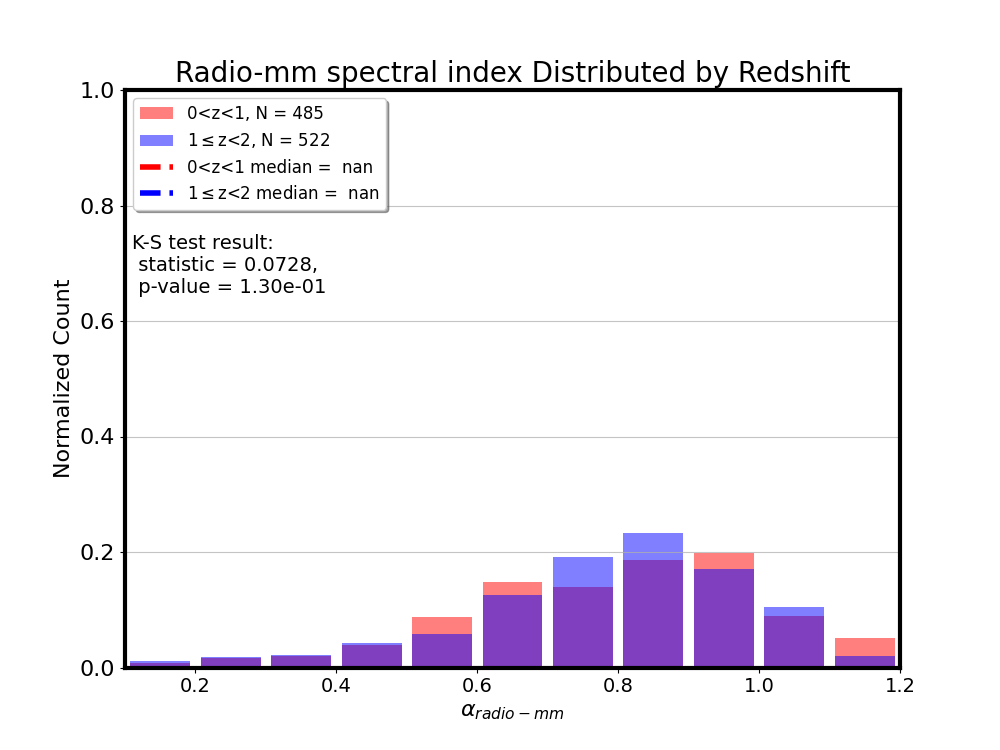

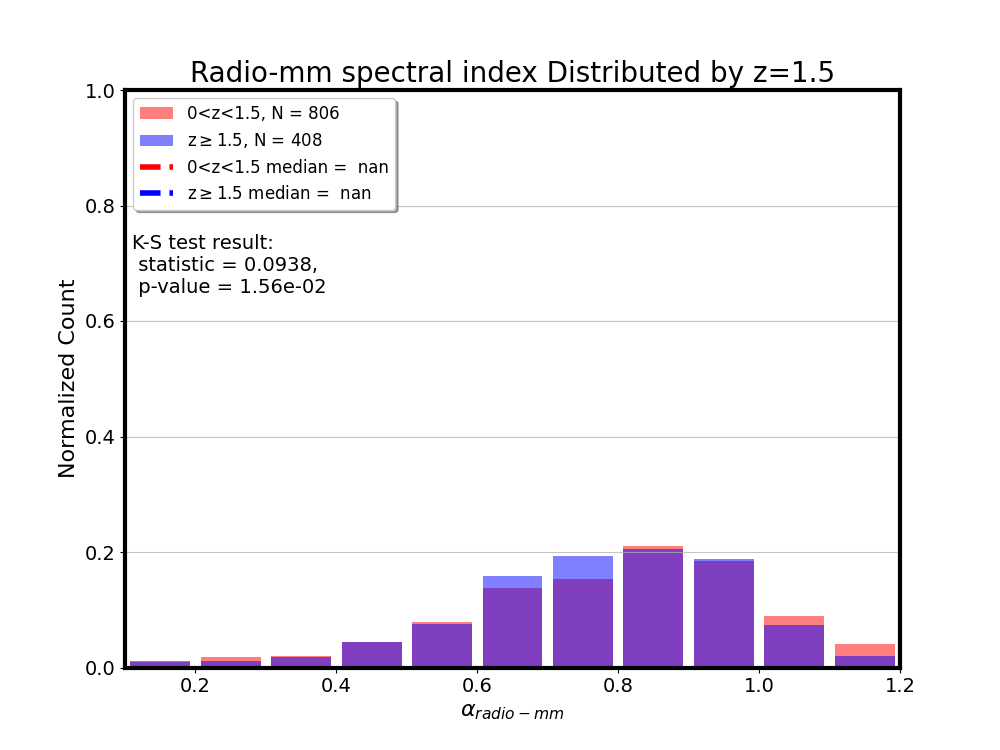

In [5]:
### Radio-mm spectral index seperate by 0<z<1 and 1<z<2
sta, pvalue = stats.ks_2samp(alpha[zsep[0]], alpha[zsep[1]])

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3

z0_med = np.median(alpha[zsep[0]])
z1_med = np.median(alpha[zsep[1]])
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alpha[zsep[0]], bins = np.arange(0.1, max(alpha[zsep[0]]) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[0])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alpha[zsep[1]], bins = np.arange(0.1, max(alpha[zsep[1]]) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[1])
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(z0_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1 median = %4.2f' %(z0_med))
plt.axvline(z1_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = '1$\leq$z<2 median = %4.2f' %(z1_med))

ax.set_xlim (0.1, 1.2)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize=14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm spectral index Distributed by Redshift'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Radio-mm spectral index seperate by z=1.5
sta, pvalue = stats.ks_2samp(alpha[zsep[3]], alpha[zsep[4]])

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3

z3_med = np.median(alpha[zsep[3]])
z4_med = np.median(alpha[zsep[4]])
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alpha[zsep[3]], bins = np.arange(0.1, max(alpha[zsep[3]]) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alpha[zsep[4]], bins = np.arange(0.1, max(alpha[zsep[4]]) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(z3_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1.5 median = %4.2f' %(z3_med))
plt.axvline(z4_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'z$\geq$1.5 median = %4.2f' %(z4_med))

ax.set_xlim (0.1, 1.2)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm spectral index Distributed by z=1.5'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2028188085.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2028188085.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2028188085.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2028188085.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2028188085.py:14: FutureWarning: Passing a set as an in

Text(0.5, 1.0, 'Compare Radio Spectreal Index with Redshift')

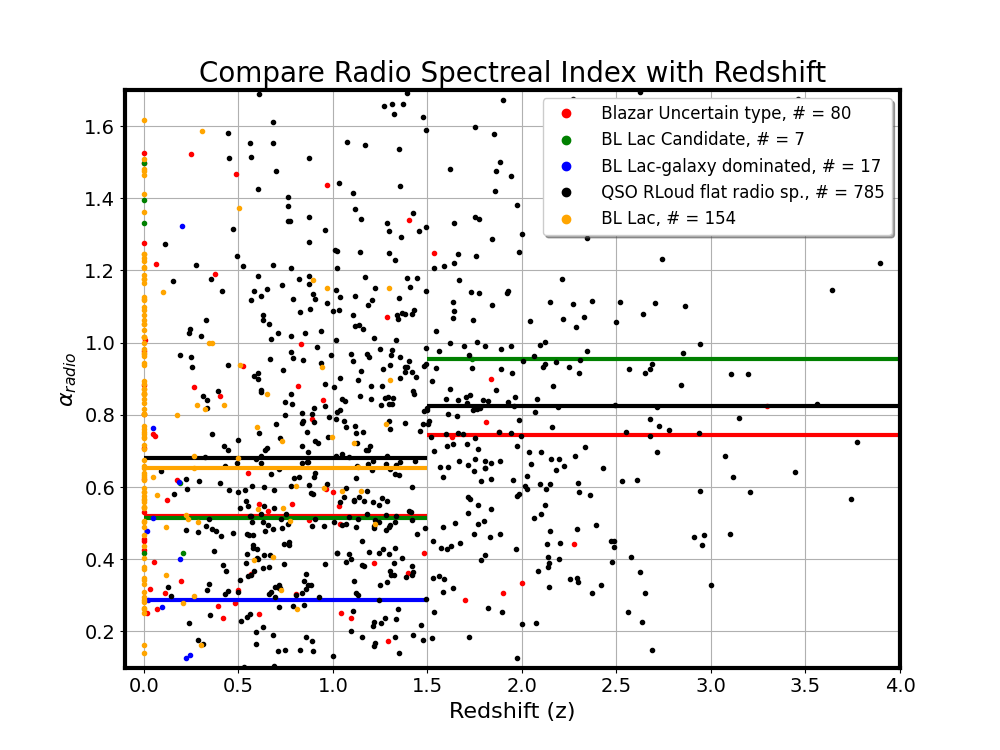

In [6]:
### radio ONLY spectral index 
# plot scattering plot
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

for i in range(0, 5):
    labelname = classnameall[i]+', # = '+str(np.count_nonzero(~np.isnan(alphaRad[classclassify[i]])))
    ax.plot((z[classclassify[i]]), alphaRad[classclassify[i]], '.', c = color[i], markersize = 6, label = labelname)
    
    for j in range(0, 2):
        over = set(classclassify[i]) & set(zsep[j+3])
        data = alphaRad[over]
        data = data[~np.isnan(data)]
        ax.hlines(y = np.median(data), xmin = inter[j], xmax = inter[j+1], linewidth = 3, color = color[i])

ax.set_xlim (-0.1, 4)
ax.set_ylim (0.1, 1.7)
    
plt.xlabel( "Redshift (z)",  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('$\\alpha_{radio}$',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(loc='upper right', shadow=True, bbox_to_anchor = (1., 1), fontsize = 12, markerscale = 2) 
figurename = 'Compare Radio Spectreal Index with Redshift'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300, bbox_inches='tight')

K-S test result: statistic =  0.042761039146926215 P-value = 0.9411465514455138


Text(0.5, 1.0, 'BL Lac and QSO Radio Spectral Index Comparasion')

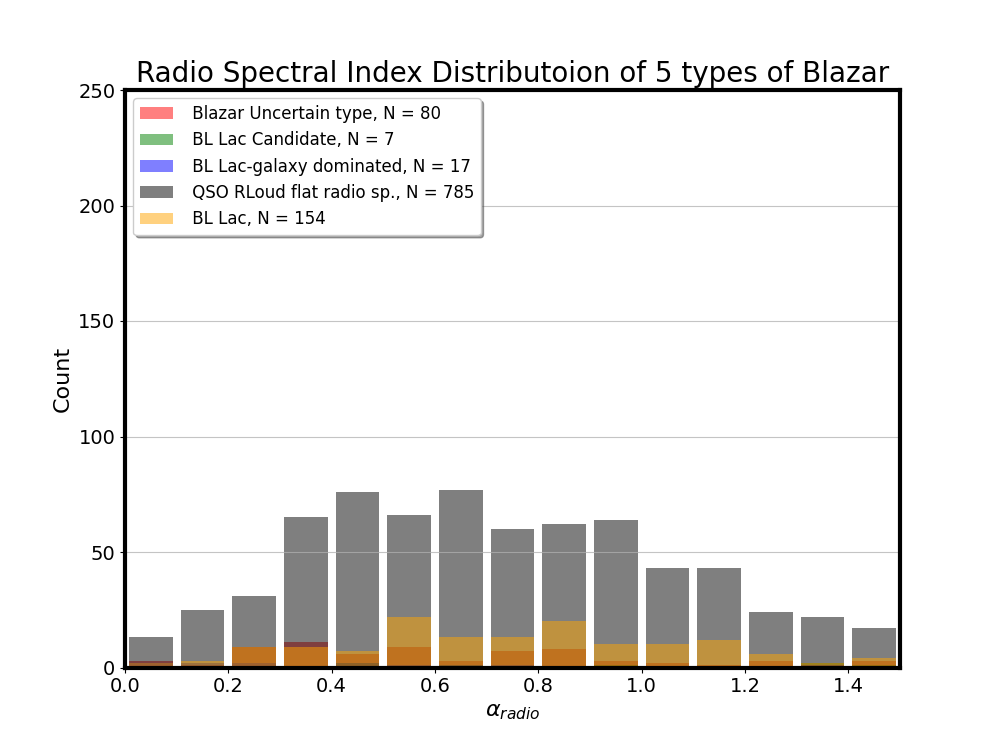

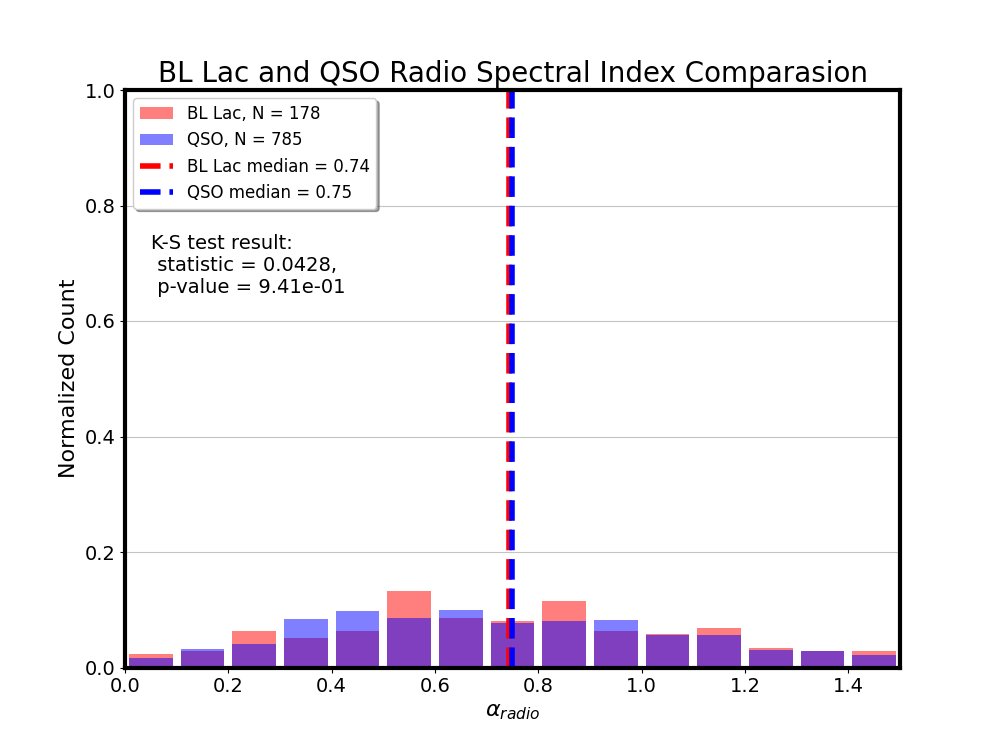

In [7]:
# plot Radio Spectral index Distribute by 5 types of Blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
for i in range(0, 5):
    value = alphaRad[classclassify[i]]
    val_nonan = value[~np.isnan(value)]
    n, bins, patches = plt.hist(x = val_nonan, bins = np.arange(0., max(val_nonan) +0.1, 0.1),
                                color = color[i], alpha = 0.5, rwidth=0.85, label = classnameall[i]+', N = '+str(len(val_nonan)))

ax.set_xlim (0., 1.5)
ax.set_ylim (0, 250)    
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio Spectral Index Distributoion of 5 types of Blazar'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
BL_Lac = np.hstack([np.array(alphaRad[classclassify[1]]), np.array(alphaRad[classclassify[2]]), np.array(alphaRad[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = np.array(alphaRad[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta, pvalue = stats.ks_2samp(BL_Lac, QSO)
print('K-S test result: statistic = ', sta, 'P-value =', pvalue)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0., max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(0., max(QSO) +0.1, 0.1), density = 1, 
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(QSO_med))

ax.set_xlim (0, 1.5)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.05, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True, fontsize = 12, markerscale = 2) 
figurename = 'BL Lac and QSO Radio Spectral Index Comparasion'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

Text(0.5, 1.0, 'Spectral index (radio ONLY) Distributed by z=1.5')

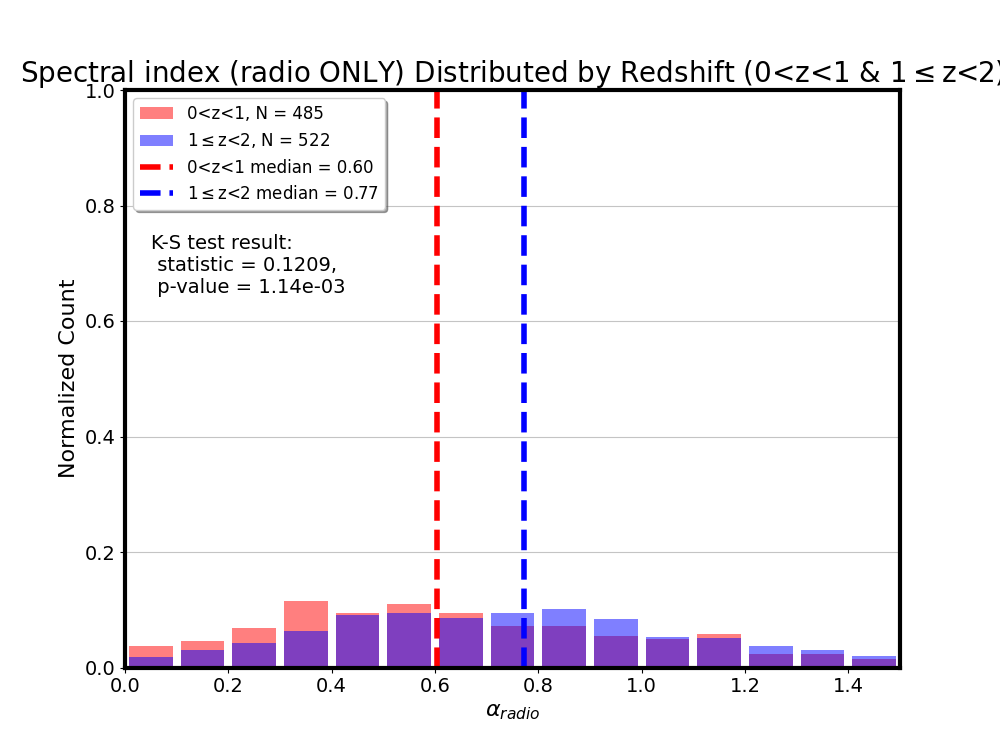

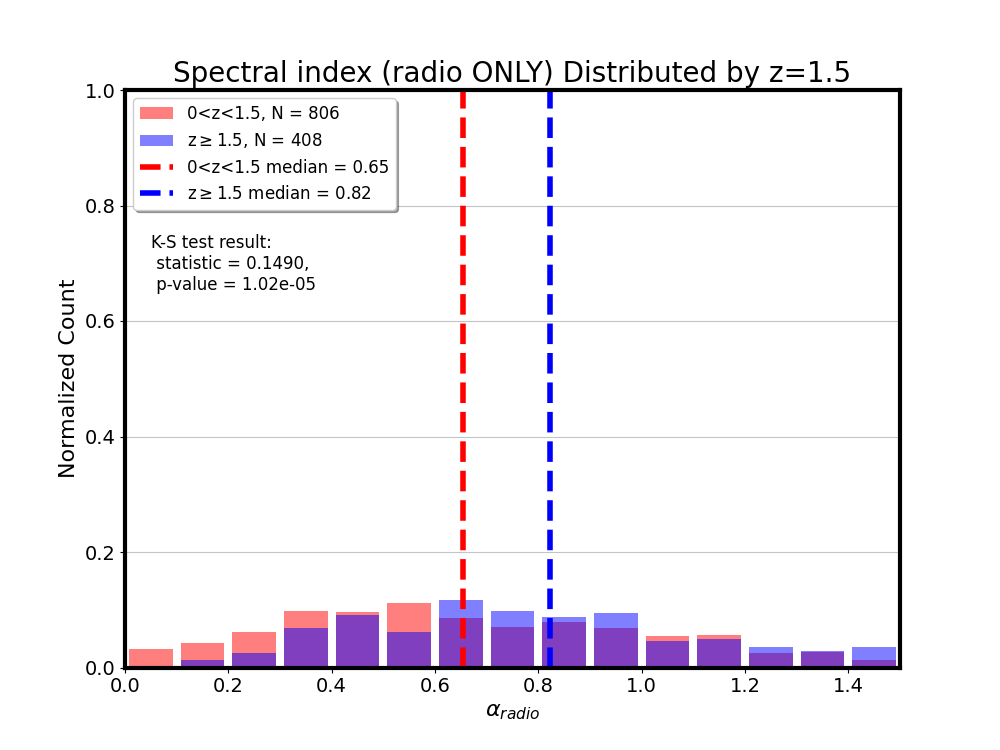

In [8]:
### Distribution of radio spectral index of 0<z<1 and 1<z<2.0
sta, pvalue = stats.ks_2samp(alphaRad[zsep[0]], alphaRad[zsep[1]])

z0 = alphaRad[zsep[0]]
z1 = alphaRad[zsep[1]]
z0 = z0[~np.isnan(z0)]
z1 = z1[~np.isnan(z1)]

z0_med = np.median(z0)
z1_med = np.median(z1)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alphaRad[zsep[0]], bins = np.arange(0., max(alphaRad[zsep[0]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[0])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alphaRad[zsep[1]], bins = np.arange(0., max(alphaRad[zsep[1]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[1])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(z0_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1 median = %4.2f' %(z0_med))
plt.axvline(z1_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = '1$\leq$z<2 median = %4.2f' %(z1_med))

ax.set_xlim (0, 1.5)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.05, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Spectral index (radio ONLY) Distributed by Redshift (0<z<1 & 1$\leq$z<2)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Distribution of radio spectral index of z lower or higher than 1.5
sta, pvalue = stats.ks_2samp(alphaRad[zsep[3]], alphaRad[zsep[4]])

z3 = alphaRad[zsep[3]]
z3 = z3[~np.isnan(z3)]
z4 = alphaRad[zsep[4]]
z4 = z4[~np.isnan(z4)]

z3_med = np.median(z3)
z4_med = np.median(z4)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alphaRad[zsep[3]], bins = np.arange(0., max(alphaRad[zsep[3]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alphaRad[zsep[4]], bins = np.arange(0., max(alphaRad[zsep[4]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(z3_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1.5 median = %4.2f' %(z3_med))
plt.axvline(z4_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'z$\geq$1.5 median = %4.2f' %(z4_med))

ax.set_xlim (0, 1.5)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.05, 0.75, text, verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Spectral index (radio ONLY) Distributed by z=1.5'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2732928686.py:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_lt15 = alpha[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2732928686.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_gt15 = alpha[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2732928686.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_lt15 = alphaRad[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2732928686.py:58: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_gt15 = alphaRad[greater1_5]


Text(0.5, 0.98, 'Spectral index (before K-correction) Distribution of QSO')

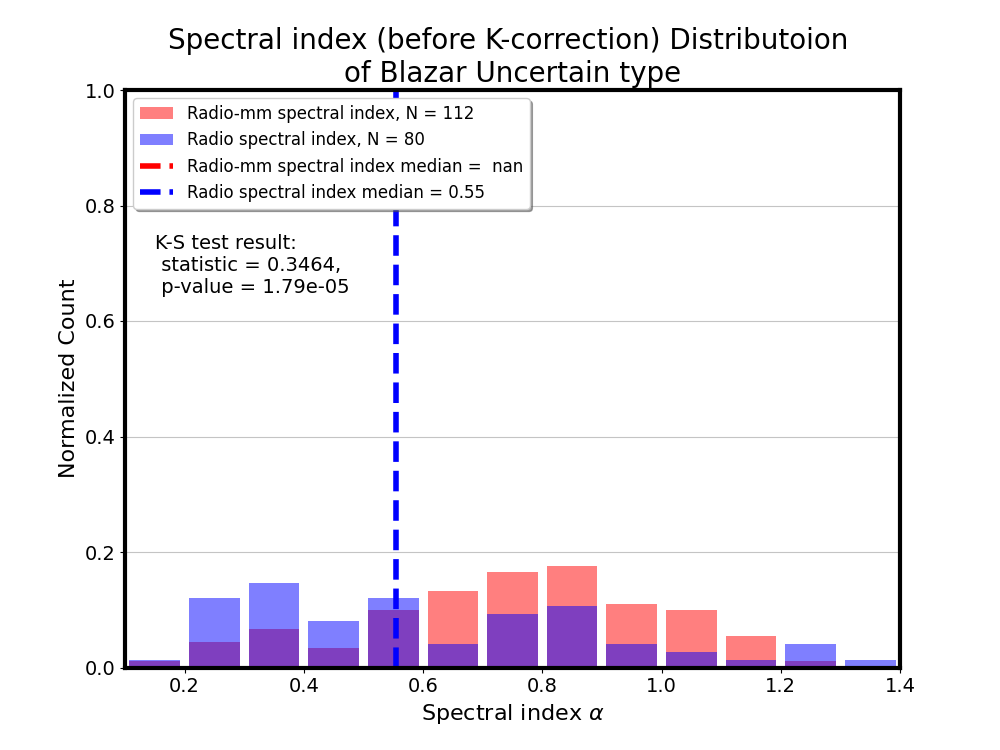

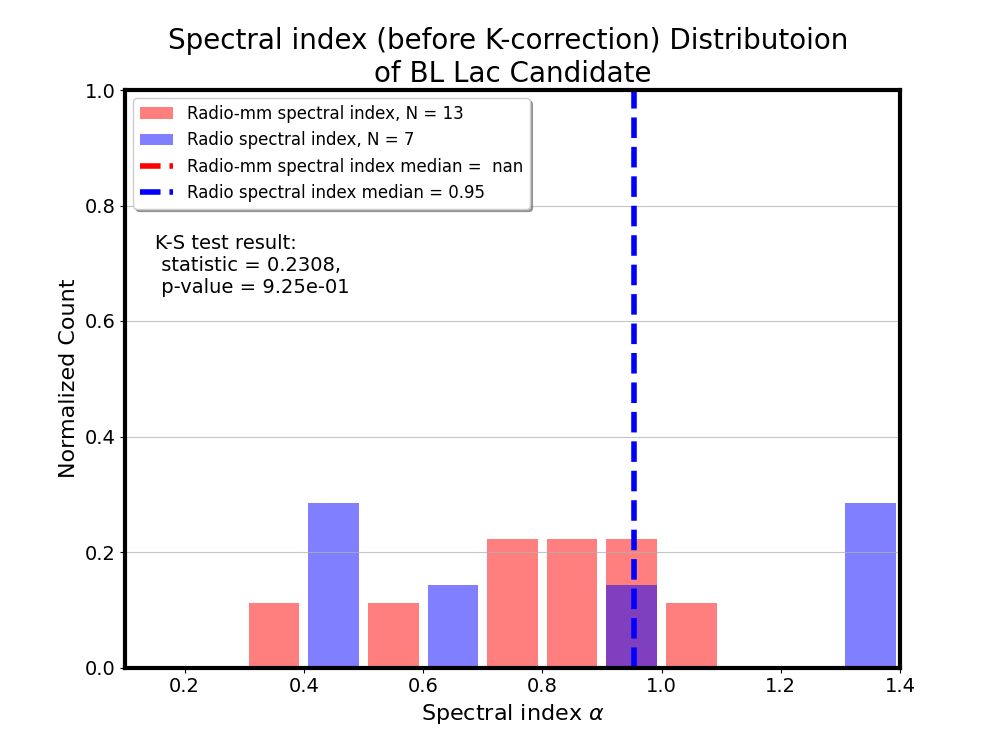

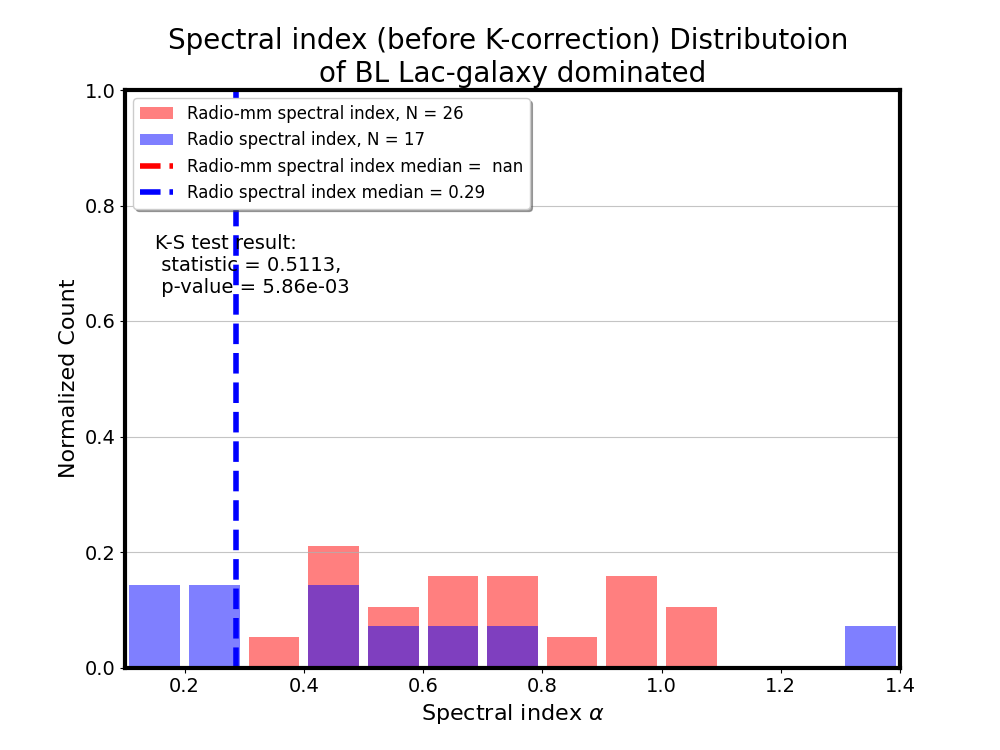

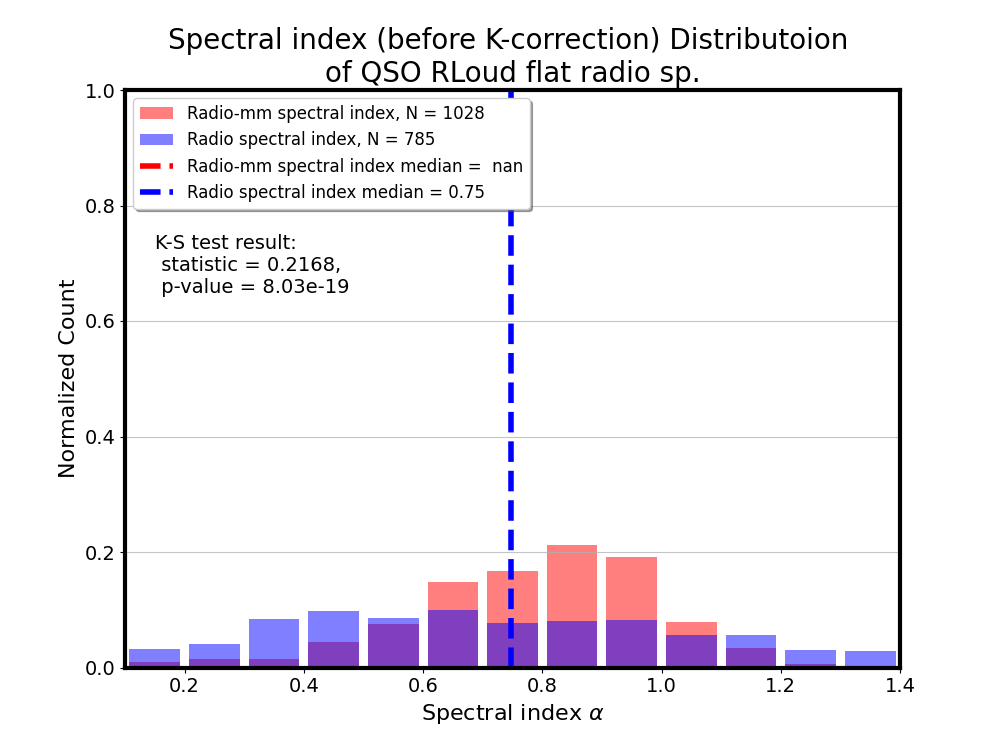

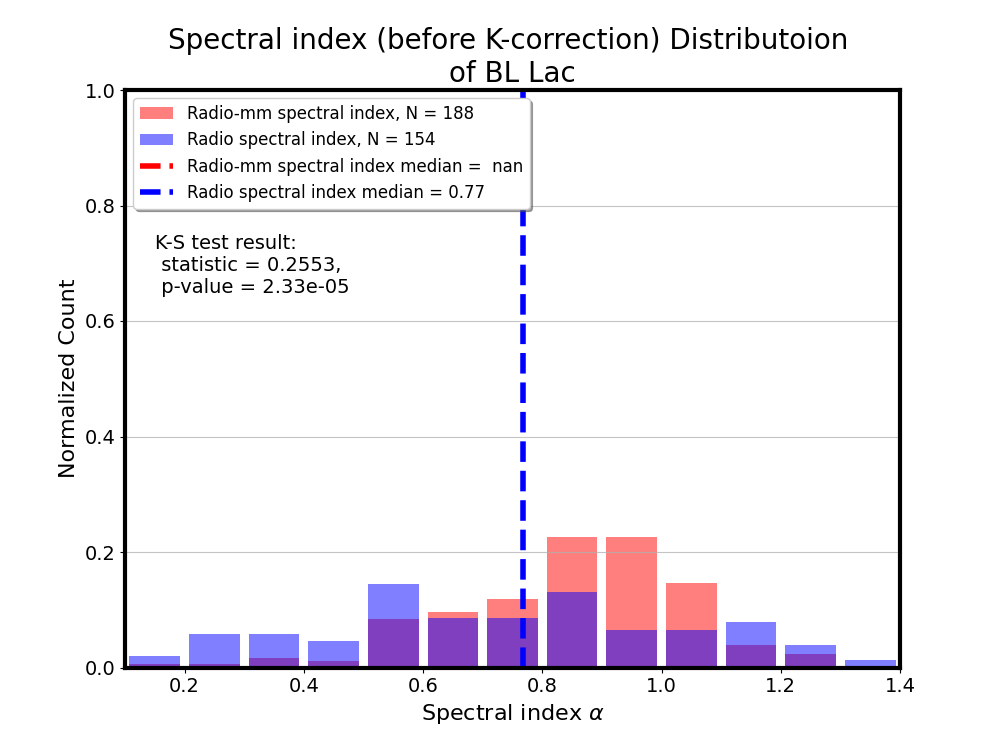

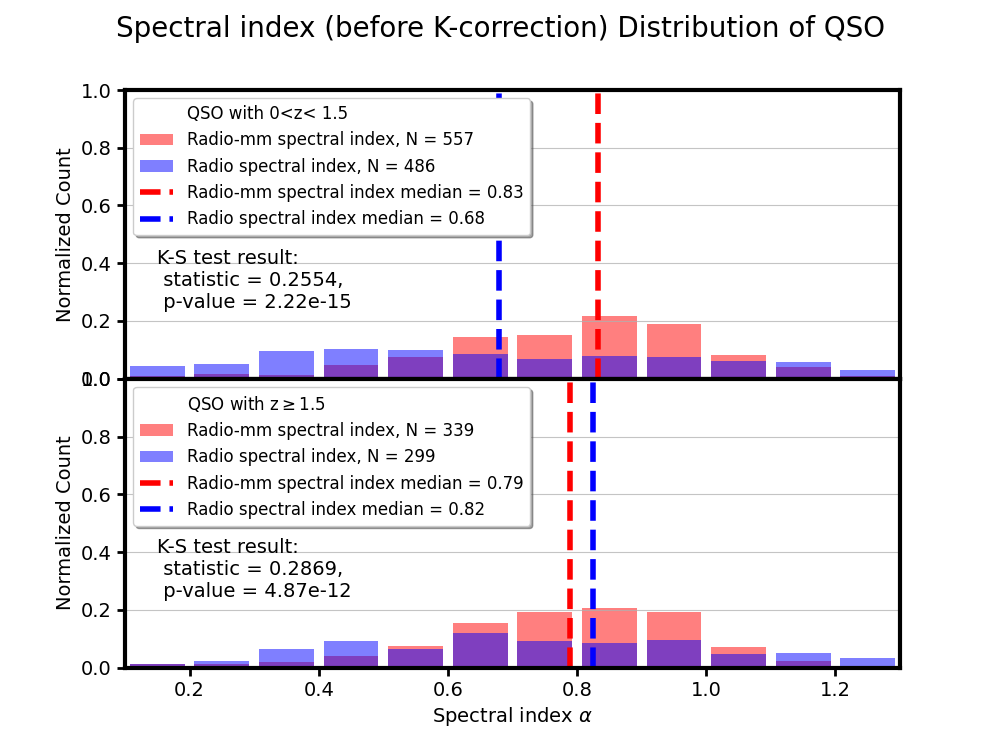

In [9]:
# plot spectral index distribution of each type of blazar
for i in range(0, 5):
    alpRad_cla = alphaRad[classclassify[i]] # radio spectral index
    alpRad_cla_nonan = alpRad_cla[~np.isnan(alpRad_cla)]
    
    sta, pvalue = stats.ks_2samp(alpha[classclassify[i]], alpRad_cla_nonan)
    
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3
    
    alp_med = np.median(alpha[classclassify[i]])
    alpRad_med = np.median(alpRad_cla_nonan)
    
    fig, ax = plt.subplots()
    n1, bins, p = plt.hist(alpha[classclassify[i]], bins = np.arange(0.1, max(alpha[classclassify[i]]) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = 'Radio-mm spectral index, N = '+str(len(alpha[classclassify[i]])))
    for item in p:
        item.set_height(item.get_height()/sum(n1))
    n2, bins, p = plt.hist(alpRad_cla_nonan, bins = np.arange(0., max(alpRad_cla_nonan) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = 'Radio spectral index, N = '+str(len(alpRad_cla_nonan)))
    for item in p:
        item.set_height(item.get_height()/sum(n2))
        
    plt.axvline(alp_med, color = 'red', linestyle = 'dashed', linewidth = 4, label =  'Radio-mm spectral index median = %4.2f' %(alp_med))
    plt.axvline(alpRad_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'Radio spectral index median = %4.2f' %(alpRad_med))

    text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
    plt.text(0.15, 0.75, text, verticalalignment = 'top', fontsize = 14)

    ax.set_xlim (0.1, 1.4)
    ax.set_ylim (0, 1)
    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Spectral index $\\alpha$',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Normalized Count',  fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
    figurename = 'Spectral index (before K-correction) Distributoion \nof' + str(classnameall[i])
    plt.title(figurename, fontsize = 20)

    #plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
    #fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Seperate QSO spectral with z greater or lower than 1.5
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# rario-mm spectral index
alp_QSO_lt15 = alpha[below1_5]
alp_QSO_lt15 = alp_QSO_lt15[~np.isnan(alp_QSO_lt15)]
alp_QSO_gt15 = alpha[greater1_5]
alp_QSO_gt15 = alp_QSO_gt15[~np.isnan(alp_QSO_gt15)]

# rario spectral index
alpRad_QSO_lt15 = alphaRad[below1_5]
alpRad_QSO_lt15 = alpRad_QSO_lt15[~np.isnan(alpRad_QSO_lt15)]
alpRad_QSO_gt15 = alphaRad[greater1_5]
alpRad_QSO_gt15 = alpRad_QSO_gt15[~np.isnan(alpRad_QSO_gt15)]
    
sta1, pvalue1 = stats.ks_2samp(alp_QSO_lt15, alpRad_QSO_lt15)
sta2, pvalue2 = stats.ks_2samp(alp_QSO_gt15, alpRad_QSO_gt15)
    
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot([], [], ' ', label = "QSO with 0<z< 1.5")
n1, bins, p = axs[0].hist(alp_QSO_lt15, bins = np.arange(0.1, max(alp_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = 'Radio-mm spectral index, N = '+str(len(alp_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRad_QSO_lt15, bins = np.arange(0., max(alpRad_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = 'Radio spectral index, N = '+str(len(alpRad_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].axvline(np.median(alp_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 4, label =  'Radio-mm spectral index median = %4.2f' % np.median(alp_QSO_lt15))
axs[0].axvline(np.median(alpRad_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'Radio spectral index median = %4.2f' % np.median(alpRad_QSO_lt15))

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta1, pvalue1)
axs[0].text(0.15, 0.45, text, verticalalignment = 'top', fontsize = 14)

axs[0].set_xlim (0.1, 1.3)
axs[0].set_ylim (0, 1)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 

# figure 2
axs[1].plot([], [], ' ', label = "QSO with z$\geq$1.5")
n1, bins, p = axs[1].hist(alp_QSO_gt15, bins = np.arange(0.1, max(alp_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = 'Radio-mm spectral index, N = '+str(len(alp_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRad_QSO_gt15, bins = np.arange(0., max(alpRad_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = 'Radio spectral index, N = '+str(len(alpRad_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].axvline(np.median(alp_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 4, label =  'Radio-mm spectral index median = %4.2f' % np.median(alp_QSO_gt15))
axs[1].axvline(np.median(alpRad_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'Radio spectral index median = %4.2f' % np.median(alpRad_QSO_gt15))

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta2, pvalue2)
axs[1].text(0.15, 0.45, text, verticalalignment = 'top', fontsize = 14)

axs[1].set_xlim (0.1, 1.3)
axs[1].set_ylim (0, 1)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()

figurename = 'Spectral index (before K-correction) Distribution of QSO'
fig.suptitle(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#ig.savefig (plotname, dpi = 300)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3408914909.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3408914909.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3408914909.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3408914909.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3408914909.py:13: FutureWarning: Passing a set as an indexer is

Text(0.5, 1.0, 'Compare Radio-mm Spectreal Index Against Redshift (K-corrections)')

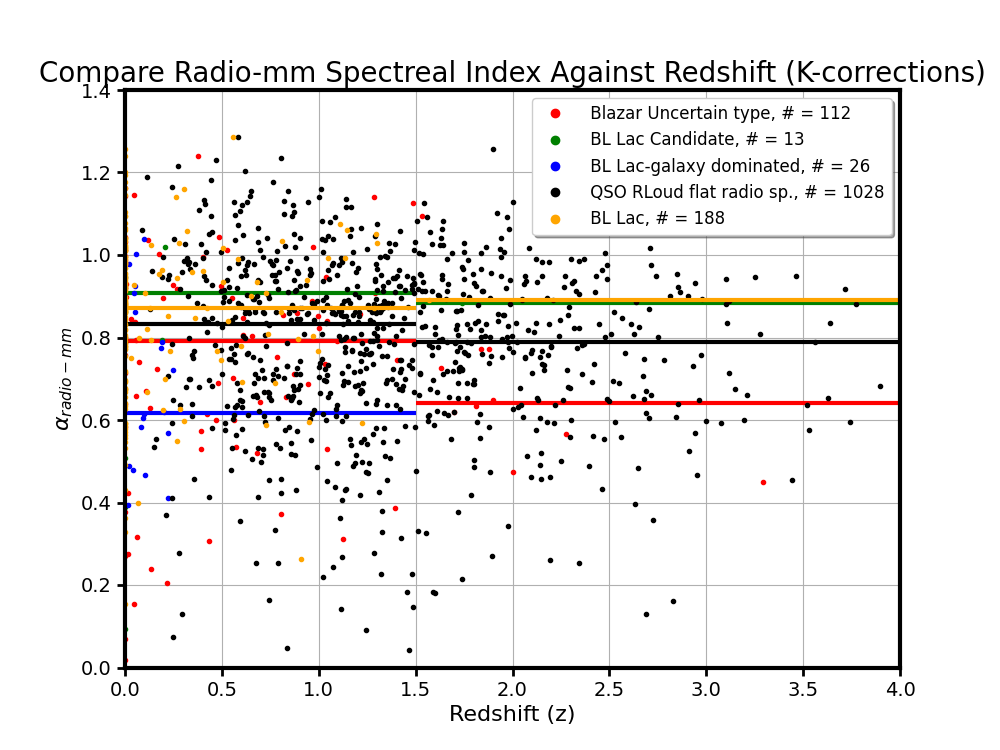

In [10]:
### Compare radio-mm spectral index with z of 5 types of blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

for i in range(0, 5):
    labelname = classnameall[i]+', # = '+str(len(classclassify[i]))
    ax.plot((z[classclassify[i]]), alphaK[classclassify[i]], '.', c = color[i], markersize = 6, label = labelname)
    
    for j in range(0, 2):
        over = set(classclassify[i]) & set(zsep[j+3])
        data = alphaK[over]
        data = data[~np.isnan(data)]
        ax.hlines(y = np.median(data), xmin = inter[j], xmax = inter[j+1], linewidth = 3, color = color[i])

ax.set_xlim (0., 4)
ax.set_ylim (0, 1.4)
    
plt.xlabel( "Redshift (z)",  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor = (1., 1.0), shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Compare Radio-mm Spectreal Index Against Redshift (K-corrections)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

K-Stest result: statistic =  0.10773667700851917 P-value = 0.024452992355236812


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/1198441645.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Text(0.5, 1.0, 'BL Lac and QSO Spectral Index (radio-mm)\n Comparasion (K-corrected)')

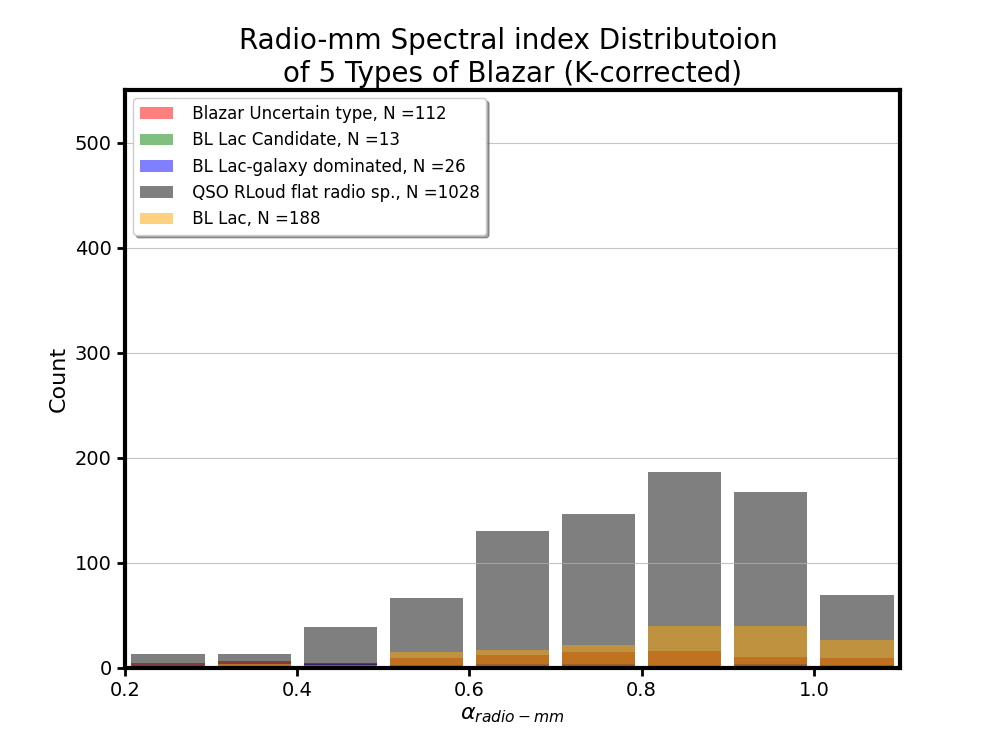

In [11]:
# plot Radio Spectral index Distribute by 5 types of Blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
for i in range(0, 5):
    n, bins, patches = plt.hist(x = alphaK[classclassify[i]], bins = np.arange(0.1, max(alphaK[classclassify[i]]) +0.1, 0.1),
                                color = color[i], alpha = 0.5, rwidth=0.85, label = classnameall[i]+', N ='+str(len(alphaK[classclassify[i]])))

ax.set_xlim (0.2, 1.1)
ax.set_ylim (0, 550)    
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm Spectral index Distributoion \nof 5 Types of Blazar (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
BL_Lac = np.hstack([np.array(alphaK[classclassify[1]]), np.array(alphaK[classclassify[2]]), np.array(alphaK[classclassify[4]])])
QSO = np.array(alphaK[classclassify[3]])

sta, pvalue = stats.ks_2samp(BL_Lac, QSO)
print('K-Stest result: statistic = ', sta, 'P-value =', pvalue)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0.1, max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(0.1, max(QSO) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL_Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(QSO_med))

ax.set_xlim (0.4, 1.1)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.12, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'BL Lac and QSO Spectral Index (radio-mm)\n Comparasion (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

Text(0.5, 1.0, 'Radio-mm Spectral Index \nDistributed by z=1.5 (K-corrected)')

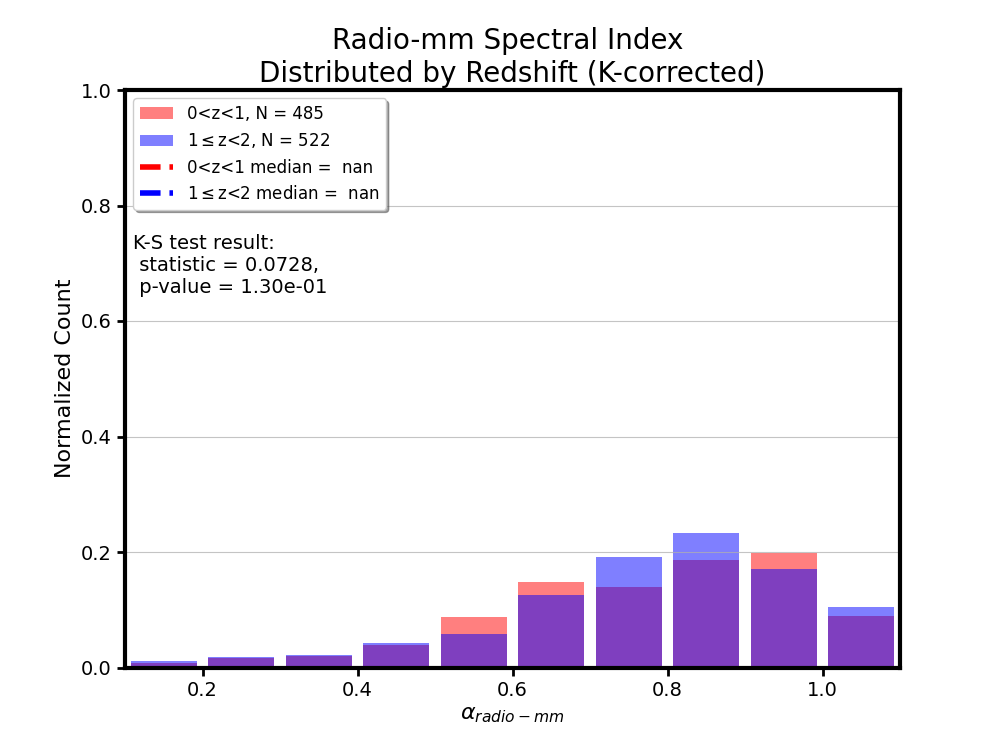

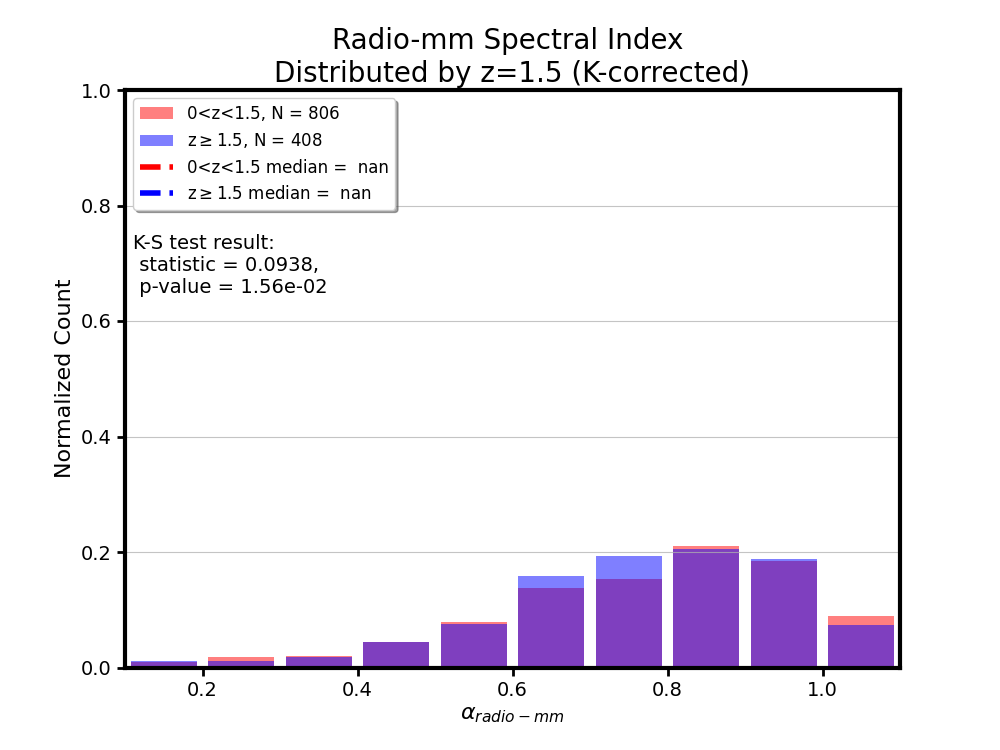

In [12]:
### Two sample K-S test
sta, pvalue = stats.ks_2samp(alphaK[zsep[0]], alphaK[zsep[1]])

z0K_med = np.median(alphaK[zsep[0]])
z1K_med = np.median(alphaK[zsep[1]])

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaK[zsep[0]], bins = np.arange(0.1, max(alphaK[zsep[0]]) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[0])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alphaK[zsep[1]], bins = np.arange(0.1, max(alphaK[zsep[1]]) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[1])
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(z0K_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1 median = %4.2f' %(z0K_med))
plt.axvline(z1K_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = '1$\leq$z<2 median = %4.2f' %(z1K_med))

ax.set_xlim (0.1, 1.1)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm Spectral Index \nDistributed by Redshift (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
sta, pvalue = stats.ks_2samp(alphaK[zsep[3]], alphaK[zsep[4]])

z3K_med = np.median(alphaK[zsep[3]])
z4K_med = np.median(alphaK[zsep[4]])

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaK[zsep[3]], bins = np.arange(0.1, max(alphaK[zsep[3]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(alphaK[zsep[4]], bins = np.arange(0.1, max(alphaK[zsep[4]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n))
    
plt.axvline(z3K_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1.5 median = %4.2f' %(z3K_med))
plt.axvline(z4K_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'z$\geq$1.5 median = %4.2f' %(z4K_med))

ax.set_xlim (0.1, 1.1)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm Spectral Index \nDistributed by z=1.5 (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

In [13]:
### frequency correstions, and flux density K-corrections
# plot scattering plot
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

for i in range(0, 5): # (0, 5)
    labelname = classnameall[i]+', # = '+str(len(classclassify[i]))
    ax.plot(z[classclassify[i]], alphaRadK[classclassify[i]], '.', c = color[i], markersize = 6, label = labelname)
    
    for j in range(0, 2): # (0, 2)
        over = set(classclassify[i]) & set(zsep[j+3])
        data = alphaRadK[over]
        data = data[~np.isnan(data)]
        ax.hlines(y = np.median(data), xmin = inter[j], xmax = inter[j+1], linewidth = 3, color = color[i])

ax.set_xlim (0., 4)
ax.set_ylim (0.2, 1.6)
    
plt.xlabel( "Redshift (z)",  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('$\\alpha_{radio}$',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor = (1., 1.), shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Compare Spectreal Index (Radio only) with Redshift (K-corrections)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2095567947.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRadK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2095567947.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRadK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2095567947.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRadK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2095567947.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = alphaRadK[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/2095567947.py:14: FutureWarning: Passing a set as a

Text(0.5, 1.0, 'Compare Spectreal Index (Radio only) with Redshift (K-corrections)')

K-Stest result: statistic =  0.042761039146926215 P-value = 0.9411465514455138


Text(0.5, 1.0, 'BL Lac and QSO Radio Spectral Index \n Comparasion (K-corrected)')

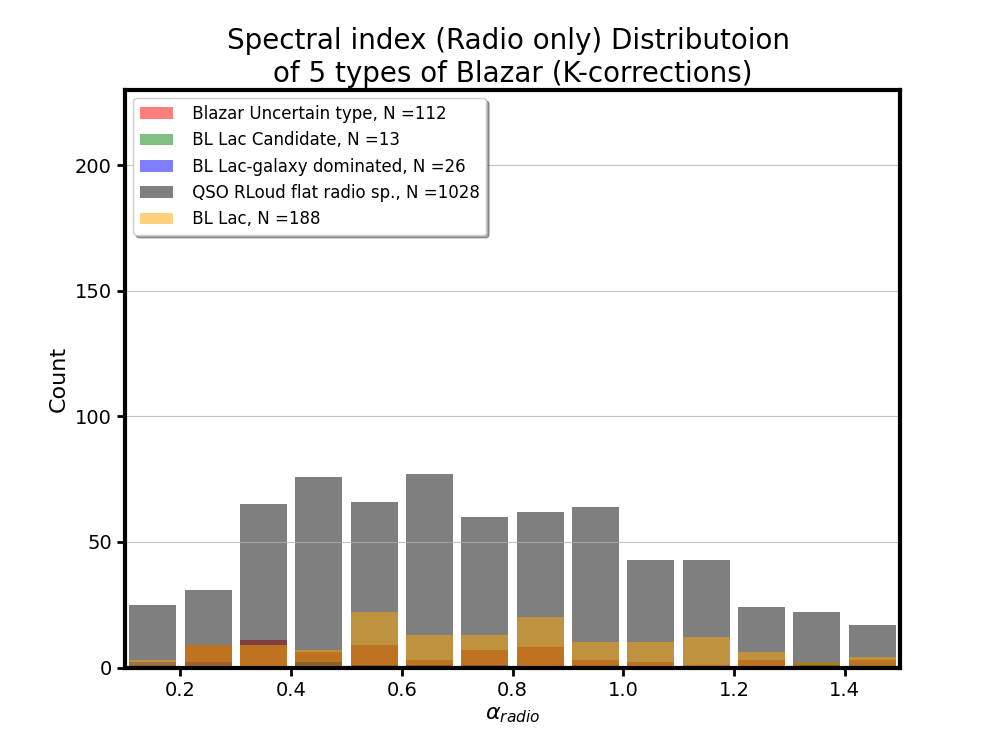

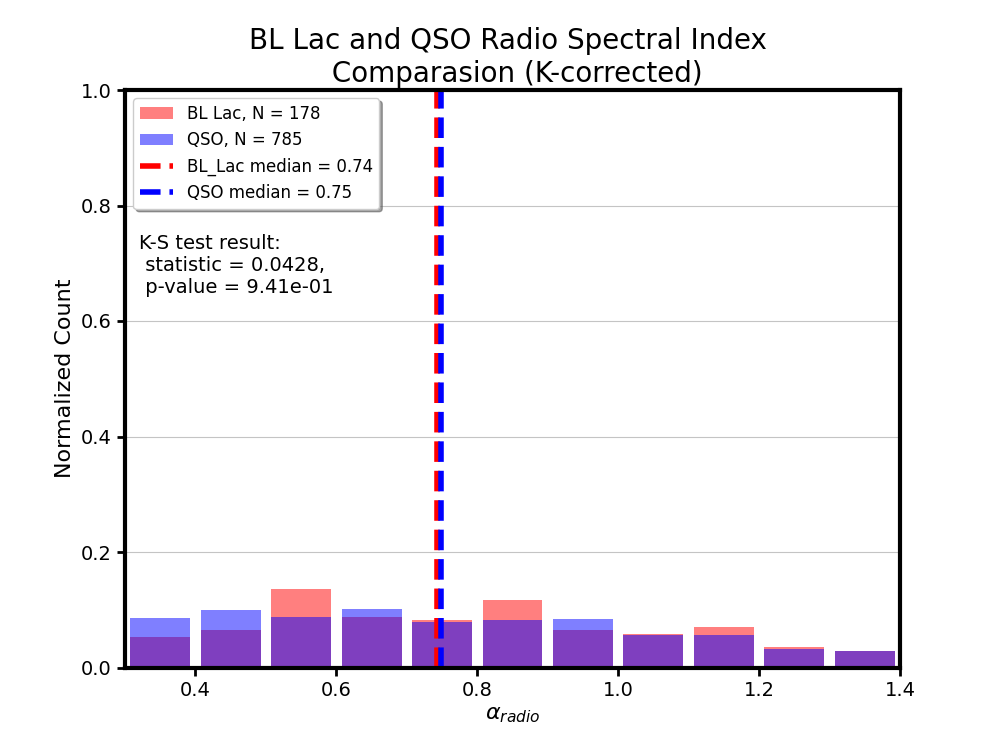

In [14]:
# plot Radio Spectral index Distribute by 5 types of Blazar
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
for i in range(0, 5):
    data = alphaRadK[classclassify[i]]
    data = data[~np.isnan(data)]
    n, bins, p = plt.hist(data, bins = np.arange(0.1, max(data)+0.1, 0.1),color = color[i], alpha = 0.5,
                          rwidth=0.85, label = classnameall[i]+', N ='+str(len(alphaRadK[classclassify[i]])))

ax.set_xlim (0.1, 1.5)
ax.set_ylim (0, 230)    
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Spectral index (Radio only) Distributoion \nof 5 types of Blazar (K-corrections)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
BL_Lac = np.hstack([np.array(alphaRadK[classclassify[1]]), np.array(alphaRadK[classclassify[2]]), np.array(alphaRadK[classclassify[4]])])
QSO = np.array(alphaRadK[classclassify[3]])

BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = QSO[~np.isnan(QSO)]

sta, pvalue = stats.ks_2samp(BL_Lac, QSO)
print('K-Stest result: statistic = ', sta, 'P-value =', pvalue)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0.1, max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(0.1, max(QSO) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL_Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(QSO_med))

ax.set_xlim (0.3, 1.4)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.32, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'BL Lac and QSO Radio Spectral Index \n Comparasion (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

K-S test result: statistic =  0.14895635673624288 P-value = 1.0208389976624826e-05


Text(0.5, 1.0, 'Radio Spectral Index \nDistributed by z=1.5 (K-corrected)')

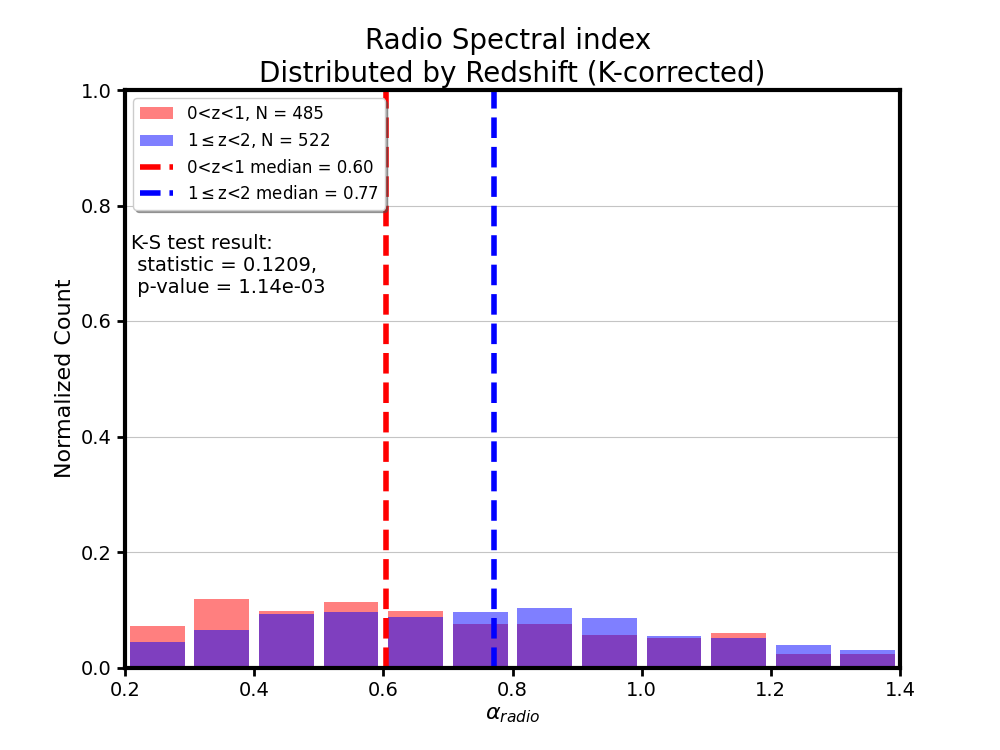

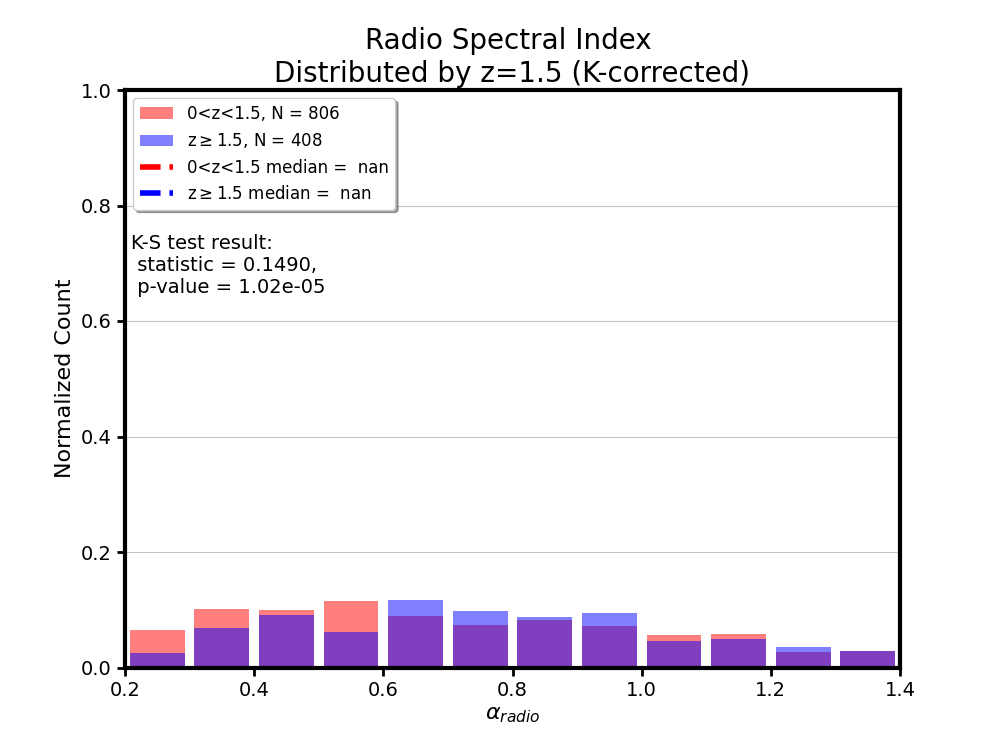

In [15]:
### Distribute rario and radio-mm spectral index by z = 1 and 2
sta, pvalue = stats.ks_2samp(alphaRadK[zsep[0]], alphaRadK[zsep[1]])

z0RadK = alphaRadK[zsep[0]]
z0RadK = z0RadK[~np.isnan(z0RadK)]
z1RadK = alphaRadK[zsep[1]]
z1RadK = z1RadK[~np.isnan(z1RadK)]

z0RadK_med = np.median(z0RadK)
z1RadK_med = np.median(z1RadK)

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaRadK[zsep[0]], bins = np.arange(0.1, np.nanmax(alphaRadK[zsep[0]]) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[0])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alphaRadK[zsep[1]], bins = np.arange(0.1, np.nanmax(alphaRadK[zsep[1]]) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[1])
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(z0RadK_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1 median = %4.2f' %(z0RadK_med))
plt.axvline(z1RadK_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = '1$\leq$z<2 median = %4.2f' %(z1RadK_med))

ax.set_xlim (0.2, 1.4)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.21, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio Spectral index \nDistributed by Redshift (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Two sample K-S test
sta, pvalue = stats.ks_2samp(alphaRadK[zsep[3]], alphaRadK[zsep[4]])

print('K-S test result: statistic = ', sta, 'P-value =', pvalue)

z3RadK_med = np.median(alphaK[zsep[3]])
z4RadK_med = np.median(alphaK[zsep[4]])

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaRadK[zsep[3]], bins = np.arange(0.1, np.nanmax(alphaRadK[zsep[3]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(alphaRadK[zsep[4]], bins = np.arange(0.1, np.nanmax(alphaRadK[zsep[4]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n))
    
plt.axvline(z3RadK_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = '0<z<1.5 median = %4.2f' %(z3K_med))
plt.axvline(z4RadK_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'z$\geq$1.5 median = %4.2f' %(z4K_med))

ax.set_xlim (0.2, 1.4)
ax.set_ylim (0, 1)    

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.21, 0.75, text, verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_{radio}$',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio Spectral Index \nDistributed by z=1.5 (K-corrected)'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/278206861.py:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_lt15 = alphaK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/278206861.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_gt15 = alphaK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/278206861.py:56: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_lt15 = alphaRadK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/278206861.py:58: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_gt15 = alphaRadK[greater1_5]


Text(0.5, 0.98, 'Spectral Index (K-corrected) Distributoion of QSO')

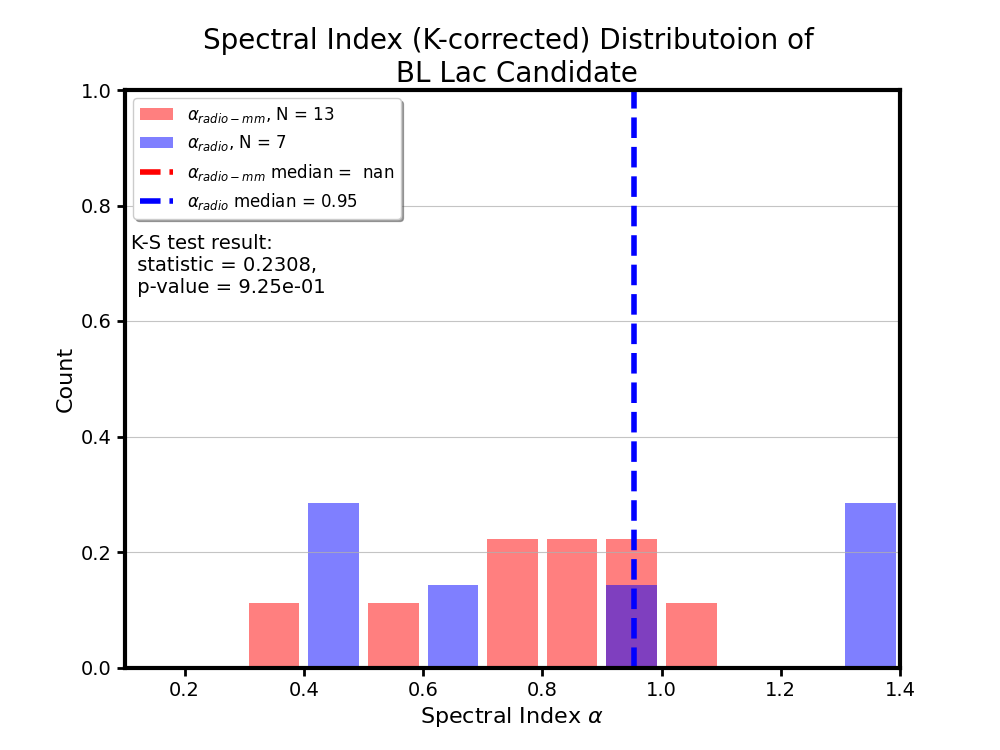

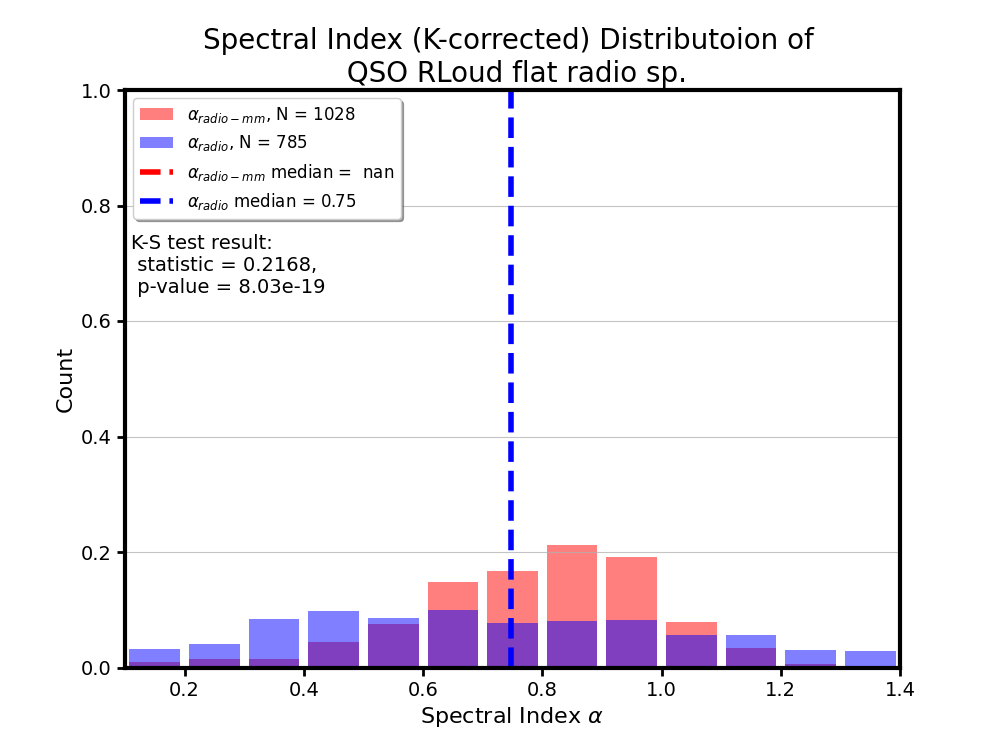

In [16]:
for i in range(0, 5):
    alpRadK_cla = alphaRadK[classclassify[i]] # radio spectral index
    alpRadK_cla_nonan = alpRadK_cla[~np.isnan(alpRadK_cla)]
    
    sta, pvalue = stats.ks_2samp(alphaK[classclassify[i]], alpRadK_cla_nonan)
    
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3
    
    alpK_med = np.median(alphaK[classclassify[i]])
    alpRadK_med = np.median(alpRadK_cla_nonan)
    
    fig, ax = plt.subplots()
    n, bins, p = plt.hist(alphaK[classclassify[i]], bins = np.arange(0.1, max(alphaK[classclassify[i]]) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio-mm}$, N = '+str(len(alphaK[classclassify[i]])))
    for item in p:
        item.set_height(item.get_height()/sum(n))
    n, bins, p = plt.hist(alpRadK_cla_nonan, bins = np.arange(0., max(alpRadK_cla_nonan) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio}$, N = '+str(len(alpRadK_cla_nonan)))
    for item in p:
        item.set_height(item.get_height()/sum(n))
        
    plt.axvline(alpK_med, color = 'red', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' %(alpK_med))
    plt.axvline(alpRadK_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' %(alpRadK_med))

    text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
    plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)

    ax.set_xlim (0.1, 1.4)
    ax.set_ylim (0, 1)
    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Spectral Index $\\alpha$',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Count', fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
    figurename = 'Spectral Index (K-corrected) Distributoion of \n' + str(classnameall[i])
    plt.title(figurename, fontsize = 20)

    #plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
    #fig.savefig (plotname, dpi = 300)
    
#######################################################################################################
### Seperate QSO spectral with z greater or lower than 1.5
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] => 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] => z >= 1.5

# rario-mm spectral index
alpK_QSO_lt15 = alphaK[below1_5]
alpK_QSO_lt15 = alpK_QSO_lt15[~np.isnan(alpK_QSO_lt15)]
alpK_QSO_gt15 = alphaK[greater1_5]
alpK_QSO_gt15 = alpK_QSO_gt15[~np.isnan(alpK_QSO_gt15)]

# rario spectral index
alpRadK_QSO_lt15 = alphaRadK[below1_5]
alpRadK_QSO_lt15 = alpRadK_QSO_lt15[~np.isnan(alpRadK_QSO_lt15)]
alpRadK_QSO_gt15 = alphaRadK[greater1_5]
alpRadK_QSO_gt15 = alpRadK_QSO_gt15[~np.isnan(alpRadK_QSO_gt15)]
    
sta1, pvalue1 = stats.ks_2samp(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta2, pvalue2 = stats.ks_2samp(alpK_QSO_gt15, alpRadK_QSO_gt15)
    
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot([], [], ' ', label = "QSO with 0<z< 1.5")
n1, bins, p = axs[0].hist(alpK_QSO_lt15, bins = np.arange(0.1, max(alpK_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio-mm}$, N = '+str(len(alpK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRadK_QSO_lt15, bins = np.arange(0., max(alpRadK_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio}$, N = '+str(len(alpRadK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].axvline(np.median(alpK_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio}$ median = %4.2f' % np.median(alpK_QSO_lt15))
axs[0].axvline(np.median(alpRadK_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(alpRadK_QSO_lt15))

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta1, pvalue1)
axs[0].text(1.1, 0.95, text, verticalalignment = 'top', fontsize = 14)

axs[0].set_xlim (0.4, 1.4)
axs[0].set_ylim (0, 1)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 

# figure 2
axs[1].plot([], [], ' ', label = "QSO with z$\geq$1.5")
n1, bins, p = axs[1].hist(alpK_QSO_gt15, bins = np.arange(0.1, max(alpK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio-mm}$, N = '+str(len(alpK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRadK_QSO_gt15, bins = np.arange(0., max(alpRadK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_{radio}$, N = '+str(len(alpRadK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].axvline(np.median(alpK_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_gt15))
axs[1].axvline(np.median(alpRadK_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(alpRadK_QSO_gt15))

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta2, pvalue2)
axs[1].text(1.1, 0.95, text, verticalalignment = 'top', fontsize = 14)

axs[1].set_xlim (0.4, 1.4)
axs[1].set_ylim (0, 1)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral Index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()

figurename = 'Spectral Index (K-corrected) Distributoion of QSO'
fig.suptitle(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#ig.savefig (plotname, dpi = 300)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3177195074.py:85: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ratio = alpha[over]/alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3177195074.py:85: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ratio = alpha[over]/alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3177195074.py:93: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ratio = alpha[over]/alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/3177195074.py:93: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ratio = alpha[over]/alphaRad[over]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/317

Text(0.5, 1.0, 'Spectral Index Ratio of QSO Seperate With z=1.5')

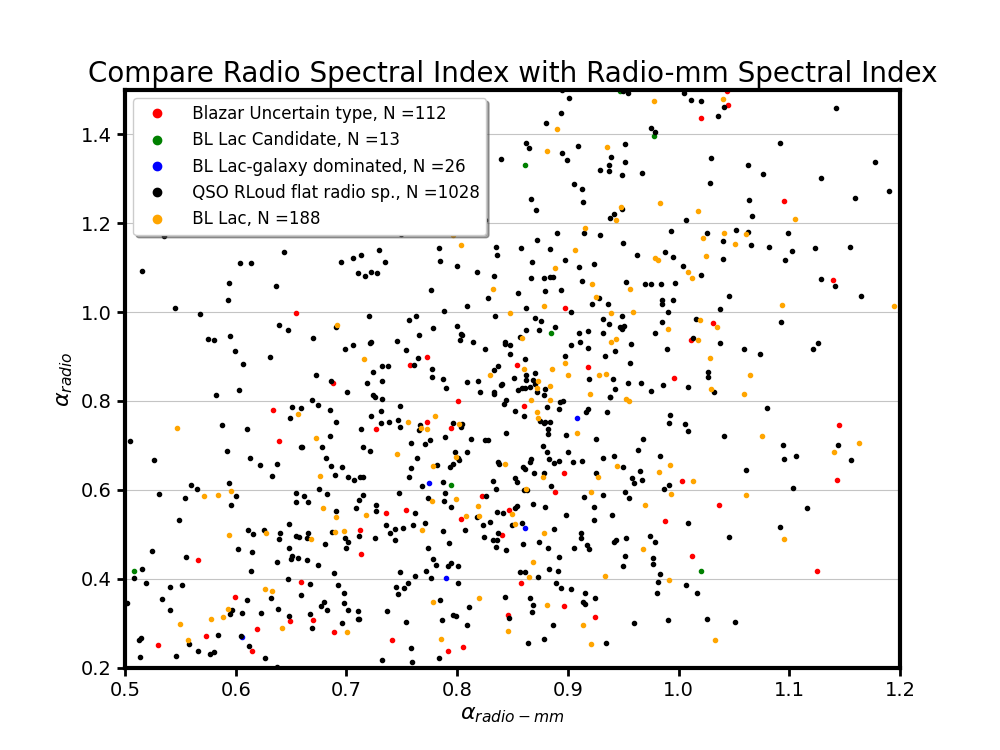

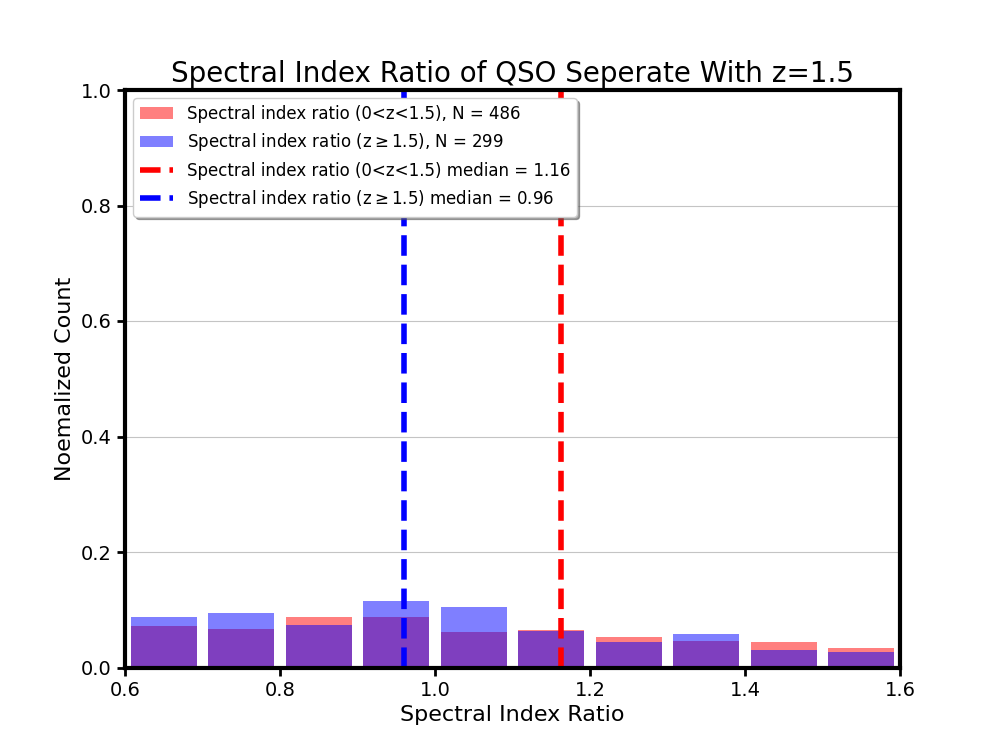

In [17]:
### Compare radio-mm spectral index between radio spectral index
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
    
for i in range(0, 5):
    ax.plot(alpha[classclassify[i]], alphaRad[classclassify[i]], '.', c = color[i], markersize = 6, 
            label = classnameall[i]+', N ='+str(len(alphaRad[classclassify[i]])))
    
    ax.set_xlim (0.5, 1.2)
    ax.set_ylim (0.2, 1.5)
        
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('$\\alpha_{radio-mm}$',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('$\\alpha_{radio}$',  fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
    figurename = 'Compare Radio Spectral Index with Radio-mm Spectral Index'
    plt.title(figurename, fontsize = 20)

    #plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
    #fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Spectral index radio in different redshift
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()
    
for i in range(0, 5):

    alp = alpha[classclassify[i]]
    alpRad = alphaRad[classclassify[i]]
    ratio = alp/alpRad

    ax.plot(np.log10(1+np.array(z[classclassify[i]])), ratio, '.', c = color[i], markersize = 6, label = classnameall[i]+', N ='+str(len(ratio)))
    
    ax.set_xlim (-0.1, 0.8) # (0, 4)
    ax.set_ylim (0.5, max(ratio[~np.isnan(ratio)])+0.2)
        
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('log(1+z)',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Spectral Index Ratio ($\\alpha_{radio-mm}$/$\\alpha_{radio}$)',  fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.legend(loc='upper right', shadow=True,  fontsize = 12, markerscale = 2) 
    figurename = 'Compare Spectral Index Ratio Against Redshift'
    plt.title(figurename, fontsize = 20)

    #plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
    #fig.savefig (plotname, dpi = 300)

#######################################################################################################
### Compare BL Lac and QSO spectral index in different redshift
# BL Lac
BL_Lac_alp = np.hstack([alpha[classclassify[1]], alpha[classclassify[2]], alpha[classclassify[4]]])
BL_Lac_alpRad = np.hstack([alphaRad[classclassify[1]], alphaRad[classclassify[2]], alphaRad[classclassify[4]] ])
notnanind_BLLac = np.where( ~np.isnan(BL_Lac_alpRad) & ~np.isnan(BL_Lac_alpRad) )

BL_Lac_alp = BL_Lac_alp[notnanind_BLLac]
BL_Lac_alpRad = BL_Lac_alpRad[notnanind_BLLac]

BL_Lac_ratio = BL_Lac_alp/BL_Lac_alpRad

#QSO
QSO_alp = alpha[classclassify[3]]
QSO_alpRad = alphaRad[classclassify[3]]
QSO_ratio = QSO_alp/QSO_alpRad
ratio_arr = [BL_Lac_ratio, QSO_ratio]

BL_Lac_ind = np.hstack([classclassify[1], classclassify[2], classclassify[4]])
QSO_ind = np.hstack([classclassify[3]])
index_arr = [BL_Lac_ind, QSO_ind]

col = ['red', 'blue']

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
ax.plot(z[notnanind_BLLac], BL_Lac_ratio, '.', c = 'red', markersize = 6, label = 'BL Lac, N = '+str(len(BL_Lac_ratio)))
over = set(BL_Lac_ind) & set(zsep[3])
ratio = alpha[over]/alphaRad[over]
ratio = ratio[~np.isnan(ratio)]
ax.hlines(y = np.median(ratio), xmin = 0, xmax = max(z[BL_Lac_ind]), linewidth = 3, color = col[0])

ax.plot(z[classclassify[3]], QSO_ratio, '.', c =  'blue', markersize = 6, label = 'QSO, N = '+str(len(QSO_ratio)))
for i in range(1, 2):
    for j in range(0, 2):
        over = set(index_arr[i]) & set(zsep[j+3])
        ratio = alpha[over]/alphaRad[over]
        ratio = ratio[~np.isnan(ratio)]
        ax.hlines(y = np.median(ratio), xmin = inter[j], xmax = inter[j+1], linewidth = 3, color = col[i])
        
ax.set_xlim (-0.1, 5)
ax.set_ylim (0.5, 2.5)    
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('log(1+z)',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Spectral Index Ratio ($\\alpha_{radio-mm}$/$\\alpha_{radio}$)',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper right', shadow=True,  fontsize = 15, markerscale = 2) 
figurename = 'Compare BL Lac and QSO Spectral Index Ratio with Redshift'
plt.title(figurename, fontsize = 20)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Compare radio-mm and radio spectral index of QSO in low and high z
#Find QSO index which its 0 < z < 1.5
below1_5 = set(classclassify[3]) & set(zsep[3])

# Find radio and radio-mm spectral index of QSO
alp_QSO_lt15 = alpha[below1_5]
alpRad_QSO_lt15 = alphaRad[below1_5]

# find common radio and radio-mm spectral index of QSO
notnanind_QSO = set(alp_QSO_lt15[~np.isnan(alp_QSO_lt15)].index) and set(alpRad_QSO_lt15[~np.isnan(alpRad_QSO_lt15)].index)

alp_QSO_lt15 = alp_QSO_lt15[notnanind_QSO]
alpRad_QSO_lt15 = alpRad_QSO_lt15[notnanind_QSO]

# spectral index ratio with z < 1.5
QSO_ratio_lt15 = alp_QSO_lt15/alpRad_QSO_lt15

#Find QSO index which its z >= 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])

alp_QSO_gt15 = alpha[greater1_5]
alpRad_QSO_gt15 = alphaRad[greater1_5]

notnanind_QSO = set(alp_QSO_gt15[~np.isnan(alp_QSO_gt15)].index) and set(alpRad_QSO_gt15[~np.isnan(alpRad_QSO_gt15)].index)

alp_QSO_gt15 = alp_QSO_gt15[notnanind_QSO]
alpRad_QSO_gt15 = alpRad_QSO_gt15[notnanind_QSO]

QSO_ratio_gt15 = alp_QSO_gt15/alpRad_QSO_gt15
    
# K-S test
sta, pvalue = stats.ks_2samp(QSO_ratio_lt15, QSO_ratio_gt15)
  
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
   
QSO_ratio_lt15_med = np.median(QSO_ratio_lt15)
QSO_ratio_gt15_med = np.median(QSO_ratio_gt15)
   
fig, ax = plt.subplots()
n, bins, p = plt.hist(QSO_ratio_lt15, bins = np.arange(0.1, max(QSO_ratio_lt15)+0.1, 0.1), density = 1,
                      color = 'red', alpha = 0.5, rwidth=0.85, label = 'Spectral index ratio (0<z<1.5), N = '+str(len(QSO_ratio_lt15)))
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(QSO_ratio_gt15, bins = np.arange(0., max(QSO_ratio_gt15)+0.1, 0.1), density = 1,
                      color = 'blue', alpha = 0.5, rwidth=0.85, label = 'Spectral index ratio (z$\geq$1.5), N = '+str(len(QSO_ratio_gt15)))
for item in p:
    item.set_height(item.get_height()/sum(n))
        
plt.axvline(QSO_ratio_lt15_med, color = 'red', linestyle = 'dashed', linewidth = 4, label =  'Spectral index ratio (0<z<1.5) median = %4.2f' %(QSO_ratio_lt15_med))
plt.axvline(QSO_ratio_gt15_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'Spectral index ratio (z$\geq$1.5) median = %4.2f' %(QSO_ratio_gt15_med))

text = 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta, pvalue)
plt.text(0.11, 0.75, text, verticalalignment = 'top', fontsize = 14)

ax.set_xlim (0.6, 1.6)
ax.set_ylim (0, 1)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Spectral Index Ratio',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Noemalized Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Spectral Index Ratio of QSO Seperate With z=1.5'
plt.title(figurename, fontsize = 20)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/1813724257.py:19: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_lt15 = alpha[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/1813724257.py:20: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_lt15 = alphaRad[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/1813724257.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_lt15 = alp_QSO_lt15[notnanind_QSO]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_55410/1813724257.py:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_lt15 = alpRad_QSO_lt15[notnanind_QSO]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T

Text(0.5, 0.98, 'Radio-mm and Radio Spectral Index of QSO in low and high z')

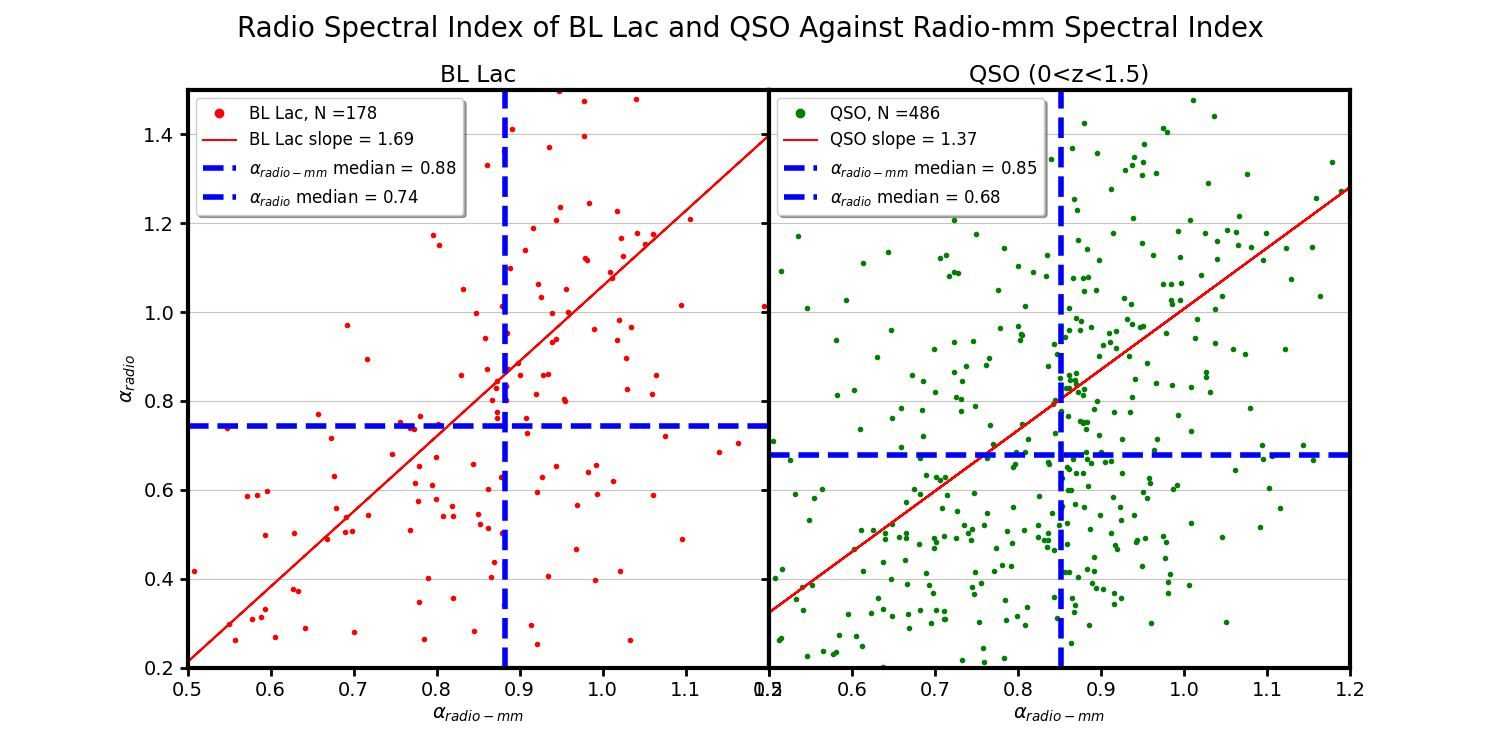

In [18]:
#######################################################################################################
### Compare radio-mm spectral index between radio spectral index
# BL Lac radio and radio-mm spectral index
BL_Lac_alp = np.hstack([alpha[classclassify[1]], alpha[classclassify[2]], alpha[classclassify[4]]])
BL_Lac_alpRad = np.hstack([alphaRad[classclassify[1]], alphaRad[classclassify[2]], alphaRad[classclassify[4]] ])
notnanind_BLLac = np.where( ~np.isnan(BL_Lac_alpRad) & ~np.isnan(BL_Lac_alpRad) )

BL_Lac_alp = BL_Lac_alp[notnanind_BLLac]
BL_Lac_alpRad = BL_Lac_alpRad[notnanind_BLLac]

# fit BL Lac slope
res_BLLac = stats.linregress(BL_Lac_alp, BL_Lac_alpRad)
yfit_BLLac = res_BLLac.intercept+res_BLLac.slope*BL_Lac_alp

#Find QSO index which its z < 1.5
below1_5 = set(classclassify[3]) & set(zsep[3])

# Find radio and radio-mm spectral index of QSO
alp_QSO_lt15 = alpha[below1_5]
alpRad_QSO_lt15 = alphaRad[below1_5]

# find common radio and radio-mm spectral index of QSO
notnanind_QSO = set(alp_QSO_lt15[~np.isnan(alp_QSO_lt15)].index) and set(alpRad_QSO_lt15[~np.isnan(alpRad_QSO_lt15)].index)

alp_QSO_lt15 = alp_QSO_lt15[notnanind_QSO]
alpRad_QSO_lt15 = alpRad_QSO_lt15[notnanind_QSO]

# fit BL Lac slope
res_QSO = stats.linregress(alp_QSO_lt15, alpRad_QSO_lt15)
yfit_QSO = res_QSO.intercept+res_QSO.slope*alp_QSO_lt15

#plot figure
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot(BL_Lac_alp, BL_Lac_alpRad, '.', c = 'red', markersize = 6, label = 'BL Lac, N ='+str(len(BL_Lac_alpRad)))
axs[0].plot(BL_Lac_alp, yfit_BLLac, '-', c = "red", label = 'BL Lac slope = %4.2f' % float(res_BLLac.slope))
axs[0].axvline(np.median(BL_Lac_alp), color = 'blue', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(BL_Lac_alp))
axs[0].axhline(np.median(BL_Lac_alpRad), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(BL_Lac_alpRad))

axs[0].set_xlim (0.5, 1.2)
axs[0].set_ylim (0.2, 1.5)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 
axs[0].title.set_text('BL Lac')

# figure 2
axs[1].plot(alp_QSO_lt15, alpRad_QSO_lt15, '.', c = 'green', markersize = 6, label ='QSO, N ='+str(len(alp_QSO_lt15)))
axs[1].plot(alp_QSO_lt15, yfit_QSO, '-', c = "red", label = 'QSO slope = %4.2f' % float(res_QSO.slope))
axs[1].axvline(np.median(alp_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(alp_QSO_lt15))
axs[1].axhline(np.median(alpRad_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(alpRad_QSO_lt15))

axs[1].set_xlim (0.5, 1.2)
axs[1].set_ylim (0.2, 1.5)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True, fontsize = 12, markerscale = 2) 
axs[1].title.set_text('QSO (0<z<1.5)')

for ax in axs.flat:
    ax.set(xlabel = '$\\alpha_{radio-mm}$', ylabel = '$\\alpha_{radio}$')
            
for ax in axs.flat:
    ax.label_outer()
    
figurename = 'Radio Spectral Index of BL Lac and QSO Against Radio-mm Spectral Index'
fig.suptitle(figurename, fontsize = 20)
#######################################################################################################
### Compare radio-mm and radio spectral index of QSO in low and high z
#Find QSO index which its 0 < z < 1.5
below1_5 = set(classclassify[3]) & set(zsep[3])

# Find radio and radio-mm spectral index of QSO
alp_QSO_lt15 = alpha[below1_5]
alpRad_QSO_lt15 = alphaRad[below1_5]

# find common radio and radio-mm spectral index of QSO
notnanind_QSO = set(alp_QSO_lt15[~np.isnan(alp_QSO_lt15)].index) and set(alpRad_QSO_lt15[~np.isnan(alpRad_QSO_lt15)].index)

alp_QSO_lt15 = alp_QSO_lt15[notnanind_QSO]
alpRad_QSO_lt15 = alpRad_QSO_lt15[notnanind_QSO]

# fit BL Lac slope
res_lt15 = stats.linregress(alp_QSO_lt15, alpRad_QSO_lt15)
yfit_lt15 = res_QSO.intercept+res_QSO.slope*alp_QSO_lt15

#Find QSO index which its z >= 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])

alp_QSO_gt15 = alpha[greater1_5]
alpRad_QSO_gt15 = alphaRad[greater1_5]

notnanind_QSO = set(alp_QSO_gt15[~np.isnan(alp_QSO_gt15)].index) and set(alpRad_QSO_gt15[~np.isnan(alpRad_QSO_gt15)].index)

alp_QSO_gt15 = alp_QSO_gt15[notnanind_QSO]
alpRad_QSO_gt15 = alpRad_QSO_gt15[notnanind_QSO]

res_gt15 = stats.linregress(alp_QSO_gt15, alpRad_QSO_gt15)
yfit_gt15 = res_gt15.intercept+res_gt15.slope*alp_QSO_gt15

#plot figure
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot(alp_QSO_lt15, alpRad_QSO_lt15, '.', c = 'green', markersize = 6, label ='QSO, N ='+str(len(alp_QSO_lt15)))

axs[0].plot(alp_QSO_lt15, yfit_lt15, '-', c = "red", label = 'QSO slope = %4.2f' % float(res_lt15.slope))
axs[0].axvline(np.median(alp_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(alp_QSO_lt15))
axs[0].axhline(np.median(alpRad_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(alpRad_QSO_lt15))

axs[0].set_xlim (0.5, 1.2)
axs[0].set_ylim (0.2, 1.5)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True, fontsize = 12, markerscale = 2) 
axs[0].title.set_text('QSO (0<z<1.5)')

# figure 2
axs[1].plot(alp_QSO_gt15, alpRad_QSO_gt15, '.', c = 'green', markersize = 6, label ='QSO, N ='+str(len(alp_QSO_gt15)))
axs[1].plot(alp_QSO_gt15, yfit_gt15, '-', c = "red", label = 'QSO slope = %4.2f' % float(res_gt15.slope))
axs[1].axvline(np.median(alp_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(alp_QSO_gt15))
axs[1].axhline(np.median(alpRad_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(alpRad_QSO_gt15))

axs[1].set_xlim (0.5, 1.2)
axs[1].set_ylim (0.2, 1.5)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True, fontsize = 12, markerscale = 2) 
axs[1].title.set_text('QSO (z$\geq$1.5)')

for ax in axs.flat:
    ax.set(xlabel = '$\\alpha_{radio-mm}$', ylabel = '$\\alpha_{radio}$')
            
for ax in axs.flat:
    ax.label_outer()
    
figurename = 'Radio-mm and Radio Spectral Index of QSO in low and high z'
fig.suptitle(figurename, fontsize = 20)

In [19]:
### Compare radio-mm spectral index between radio spectral index
BL_Lac_alp = np.hstack([np.array(alpha[classclassify[1]]), np.array(alpha[classclassify[2]]), np.array(alpha[classclassify[4]])])
BL_Lac_alpRad = np.hstack([np.array(alphaRad[classclassify[1]]), np.array(alphaRad[classclassify[2]]), np.array(alphaRad[classclassify[4]])])

QSO_alp = np.array(alpha[classclassify[3]])
QSO_alpRad = np.array(alphaRad[classclassify[3]])

BL_Lac_ind = np.hstack([classclassify[1], classclassify[2], classclassify[4]])
QSO_ind = np.hstack([classclassify[3]])
index_arr = [BL_Lac_ind, QSO_ind]

plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot(np.log10(1+np.array(z[BL_Lac_ind])), BL_Lac_alp, '.', c = 'red', markersize = 6, label = '$\\alpha_{radio-mm}$, N ='+str(len(BL_Lac_alp)))
axs[0].plot(np.log10(1+np.array(z[BL_Lac_ind])), BL_Lac_alpRad, '.', c = 'blue', markersize = 6, label = '$\\alpha_{radio-mm}$, N ='+str(len(BL_Lac_alpRad)))
    
axs[0].axhline(np.median(BL_Lac_alp), color = 'red', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(BL_Lac_alp))
axs[0].axhline(np.median(BL_Lac_alpRad[~np.isnan(BL_Lac_alpRad)]), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(BL_Lac_alpRad[~np.isnan(BL_Lac_alpRad)]))

axs[0].set_xlim (-0.1, 0.5)
axs[0].set_ylim (0., 2)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 
axs[0].title.set_text('BL Lac')

# figure 2
axs[1].plot(np.log10(1+np.array(z[QSO_ind])), QSO_alp, '.', c = 'red', markersize = 6, label = '$\\alpha_{radio-mm}$, N ='+str(len(QSO_alp)))
axs[1].plot(np.log10(1+np.array(z[QSO_ind])), QSO_alpRad, '.', c = 'blue', markersize = 6, label = '$\\alpha_{radio-mm}$, N ='+str(len(QSO_alpRad)))

axs[1].axhline(np.median(QSO_alp), color = 'red', linestyle = 'dashed', linewidth = 4, label =  '$\\alpha_{radio-mm}$ median = %4.2f' % np.median(QSO_alp))
axs[1].axhline(np.median(QSO_alpRad[~np.isnan(QSO_alpRad)]), color = 'blue', linestyle = 'dashed', linewidth = 4, label = '$\\alpha_{radio}$ median = %4.2f' % np.median(QSO_alpRad[~np.isnan(QSO_alpRad)]))

axs[1].set_xlim (-0.1, 0.8)
axs[1].set_ylim (0., 2)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True, fontsize = 12, markerscale = 2) 
axs[1].title.set_text('QSO')

for ax in axs.flat:
    ax.set(xlabel = 'log(1+z)', ylabel = 'Spectral Index $\\alpha$')
            
for ax in axs.flat:
    ax.label_outer()
    
figurename = 'Spectral Index Distributoion of BL Lac and QSO Against Redshift'
fig.suptitle(figurename, fontsize = 20)

Text(0.5, 0.98, 'Spectral Index Distributoion of BL Lac and QSO Against Redshift')

In [20]:
import scipy.integrate as integrate
import scipy.special as special

x2 = lambda x: x**2
result = integrate.quad(x2, 0, 4)

result

(21.333333333333336, 2.368475785867001e-13)